In [1]:
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn import tree
import xgboost as xgb

In [2]:
data =  pd.read_csv("C:/Users/akars/Downloads/Chennai houseing sale.csv")
pd.set_option('display.max_columns', None)
data.head(3)

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0         1.0       3  AbNormal        Yes  15-05-1967  Commercial   
1         1.0       5  AbNormal         No  22-12-1995  Commercial   
2         1.0       3  AbNormal        Yes  09-02-1992  Commercial   

  UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
0        AllPub   Paved      A       4.0          3.9         4.9       4.330   
1        AllPub  Gravel     RH       4.9          4.2         2.5       3.765   
2           ELO  Gravel     RL       4.1          3.8         2.2       3.090   

   REG_FEE  COMMIS  SALES_PRICE  
0   380000  144400      7600000  
1   760122  304049     21717770  
2   421094   92114     13159200

In [3]:
# Removing all the null values
data.dropna(inplace=True)

# Renaming all the column names in lowercase letters
data.columns = data.columns.str.lower()


# Renaming all the string in area column names in lowercase letters
data.area = data.area.str.lower()

# Correcting the spelling mistakes in area columns
data.area = data.area.replace({'velchery':'velachery', 
                       'kknagar':'kk nagar', 
                       'tnagar':'t nagar', 
                       'chormpet':'chrompet', 
                       'chrompt':'chrompet', 
                       'chrmpet':'chrompet', 
                       'ana nagar':'anna nagar', 
                       'ann nagar':'anna nagar',
                       'karapakam':'karapakkam', 
                       'adyr':'adyar'})


# Renaming all the string in sale_cond column names in lowercase letters
data.sale_cond = data.sale_cond.str.lower()

# Correcting the spelling mistakes in sale_cond columns
data.sale_cond = data.sale_cond.replace({'adj land':'adjland', 
                       'normal sale':'normal sale',
                       'partiall':'partial',
                       'ab normal':'abnormal'})


# Renaming all the string in park_facil column names in lowercase letters
data.park_facil = data.park_facil.str.lower()

# Correcting the spelling mistakes in park_facil columns
data.park_facil = data.park_facil.replace({'noo':'no'})


# Renaming all the string in buildtype column names in lowercase letters
data.buildtype = data.buildtype.str.lower()

# Correcting the spelling mistakes in buildtype columns
data.buildtype = data.buildtype.replace({'comercial':'commercial', 
                       'others':'other'})


# Renaming all the string in utility_avail column names in lowercase letters
data.utility_avail = data.utility_avail.str.lower()

# Correcting the spelling mistakes in utility_avail columns
data.utility_avail = data.utility_avail.replace({'all pub':'allpub',
                                             'nosewr':'nosewa'})
                                            
                                            
# Renaming all the string in street column names in lowercase letters
data.street = data.street.str.lower()

# Correcting the spelling mistakes in street columns
data.street = data.street.replace({'pavd':'paved', 
                       'noaccess':'no access'})


# Renaming all the string in mzzone column names in lowercase letters
data.mzzone = data.mzzone.str.lower()

# Fixing the correct Data Type of columns
data.n_bedroom = data.n_bedroom.astype(int)
data.n_bathroom = data.n_bathroom.astype(int)

# Correcting Date columnd from object to daterime format
data.date_sale = pd.to_datetime(data.date_sale, format='%d-%m-%Y')
data.date_build = pd.to_datetime(data.date_build, format='%d-%m-%Y')

# Creating property_age column which deternine how old the property id
data['property_age'] = pd.DatetimeIndex(data.date_sale).year - pd.DatetimeIndex(data.date_build).year

# Creating total_price column by adding 'reg_fee', 'commis', 'sales_price' columns
data['total_price'] = pd.DataFrame(data.reg_fee	+ data.commis	+ data.sales_price)

# Rearranging the columns of dataframe 
data = data.reindex(columns = ['prt_id', 'area', 'sale_cond', 'park_facil',
       'buildtype', 'utility_avail', 'street', 'mzzone', 
       'date_build', 'date_sale', 'property_age', 
       'int_sqft', 'dist_mainroad', 'n_bedroom','n_bathroom', 'n_room', 
       'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall', 
       'reg_fee', 'commis', 'sales_price', 'total_price'])

data.head(3)

prt_id        area sale_cond park_facil   buildtype utility_avail  street  \
0  P03210  karapakkam  abnormal        yes  commercial        allpub   paved   
1  P09411  anna nagar  abnormal         no  commercial        allpub  gravel   
2  P01812       adyar  abnormal        yes  commercial           elo  gravel   

  mzzone date_build  date_sale  property_age  int_sqft  dist_mainroad  \
0      a 1967-05-15 2011-05-04            44      1004            131   
1     rh 1995-12-22 2006-12-19            11      1986             26   
2     rl 1992-02-09 2012-02-04            20       909             70   

   n_bedroom  n_bathroom  n_room  qs_rooms  qs_bathroom  qs_bedroom  \
0          1           1       3       4.0          3.9         4.9   
1          2           1       5       4.9          4.2         2.5   
2          1           1       3       4.1          3.8         2.2   

   qs_overall  reg_fee  commis  sales_price  total_price  
0       4.330   380000  144400      7600000      8124400  
1       3.765   760122  304049     21717770     22781941  
2       3.090   421094   92114     13159200     13672408

In [4]:
print(data.dtypes)


prt_id                   object
area                     object
sale_cond                object
park_facil               object
buildtype                object
utility_avail            object
street                   object
mzzone                   object
date_build       datetime64[ns]
date_sale        datetime64[ns]
property_age              int32
int_sqft                  int64
dist_mainroad             int64
n_bedroom                 int64
n_bathroom                int64
n_room                    int64
qs_rooms                float64
qs_bathroom             float64
qs_bedroom              float64
qs_overall              float64
reg_fee                   int64
commis                    int64
sales_price               int64
total_price               int64
dtype: object


In [5]:
numeric_data = data.select_dtypes(include=[np.number])


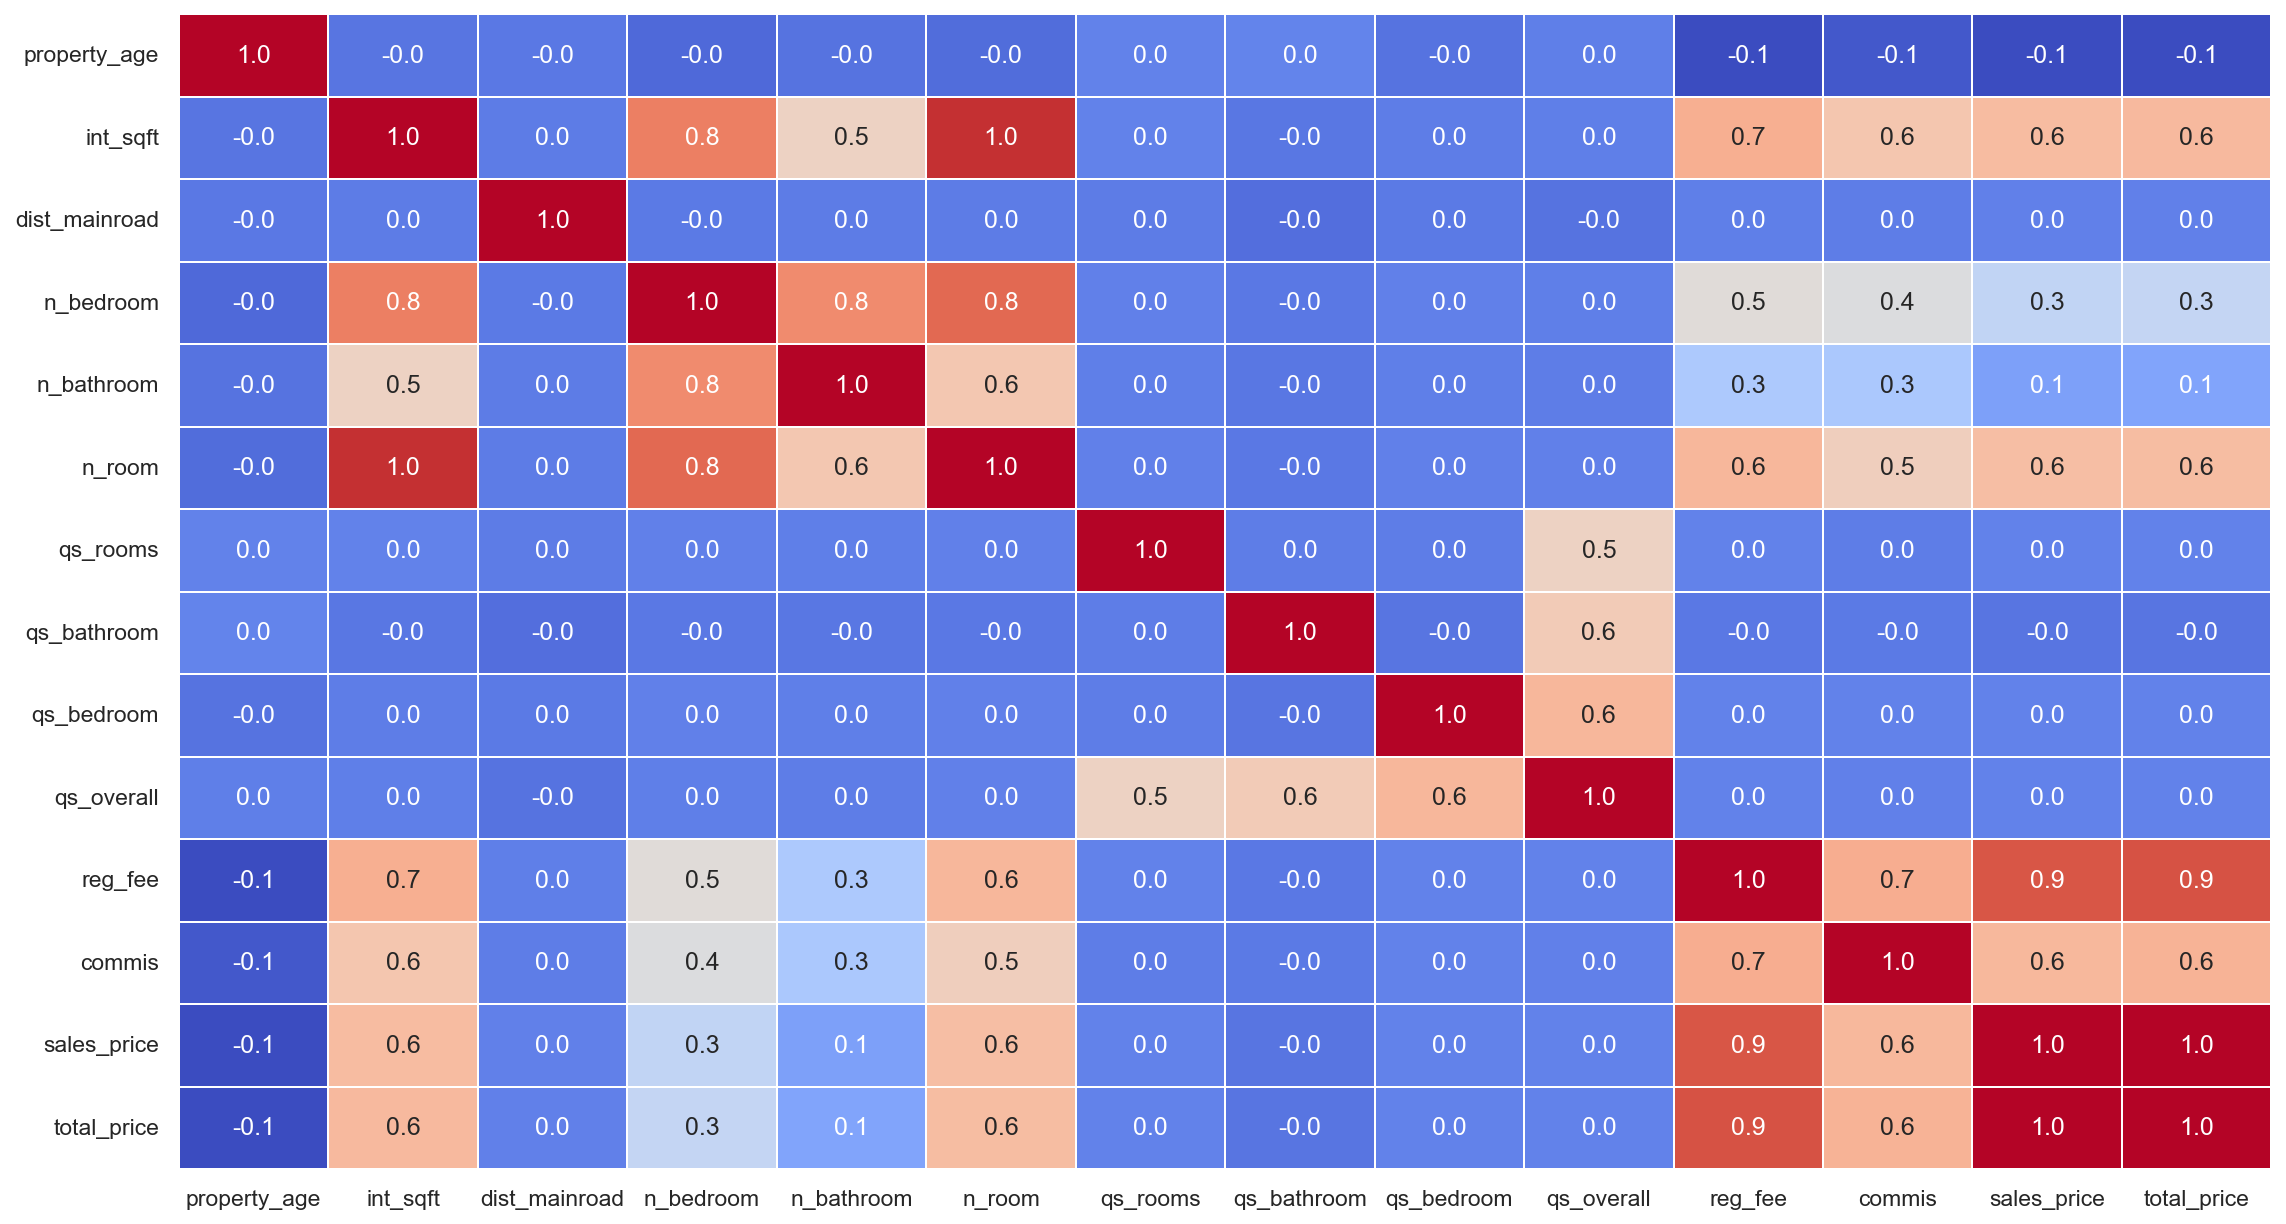

In [6]:
plt.figure(figsize=(18, 10), dpi=150)
sns.heatmap(numeric_data.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');


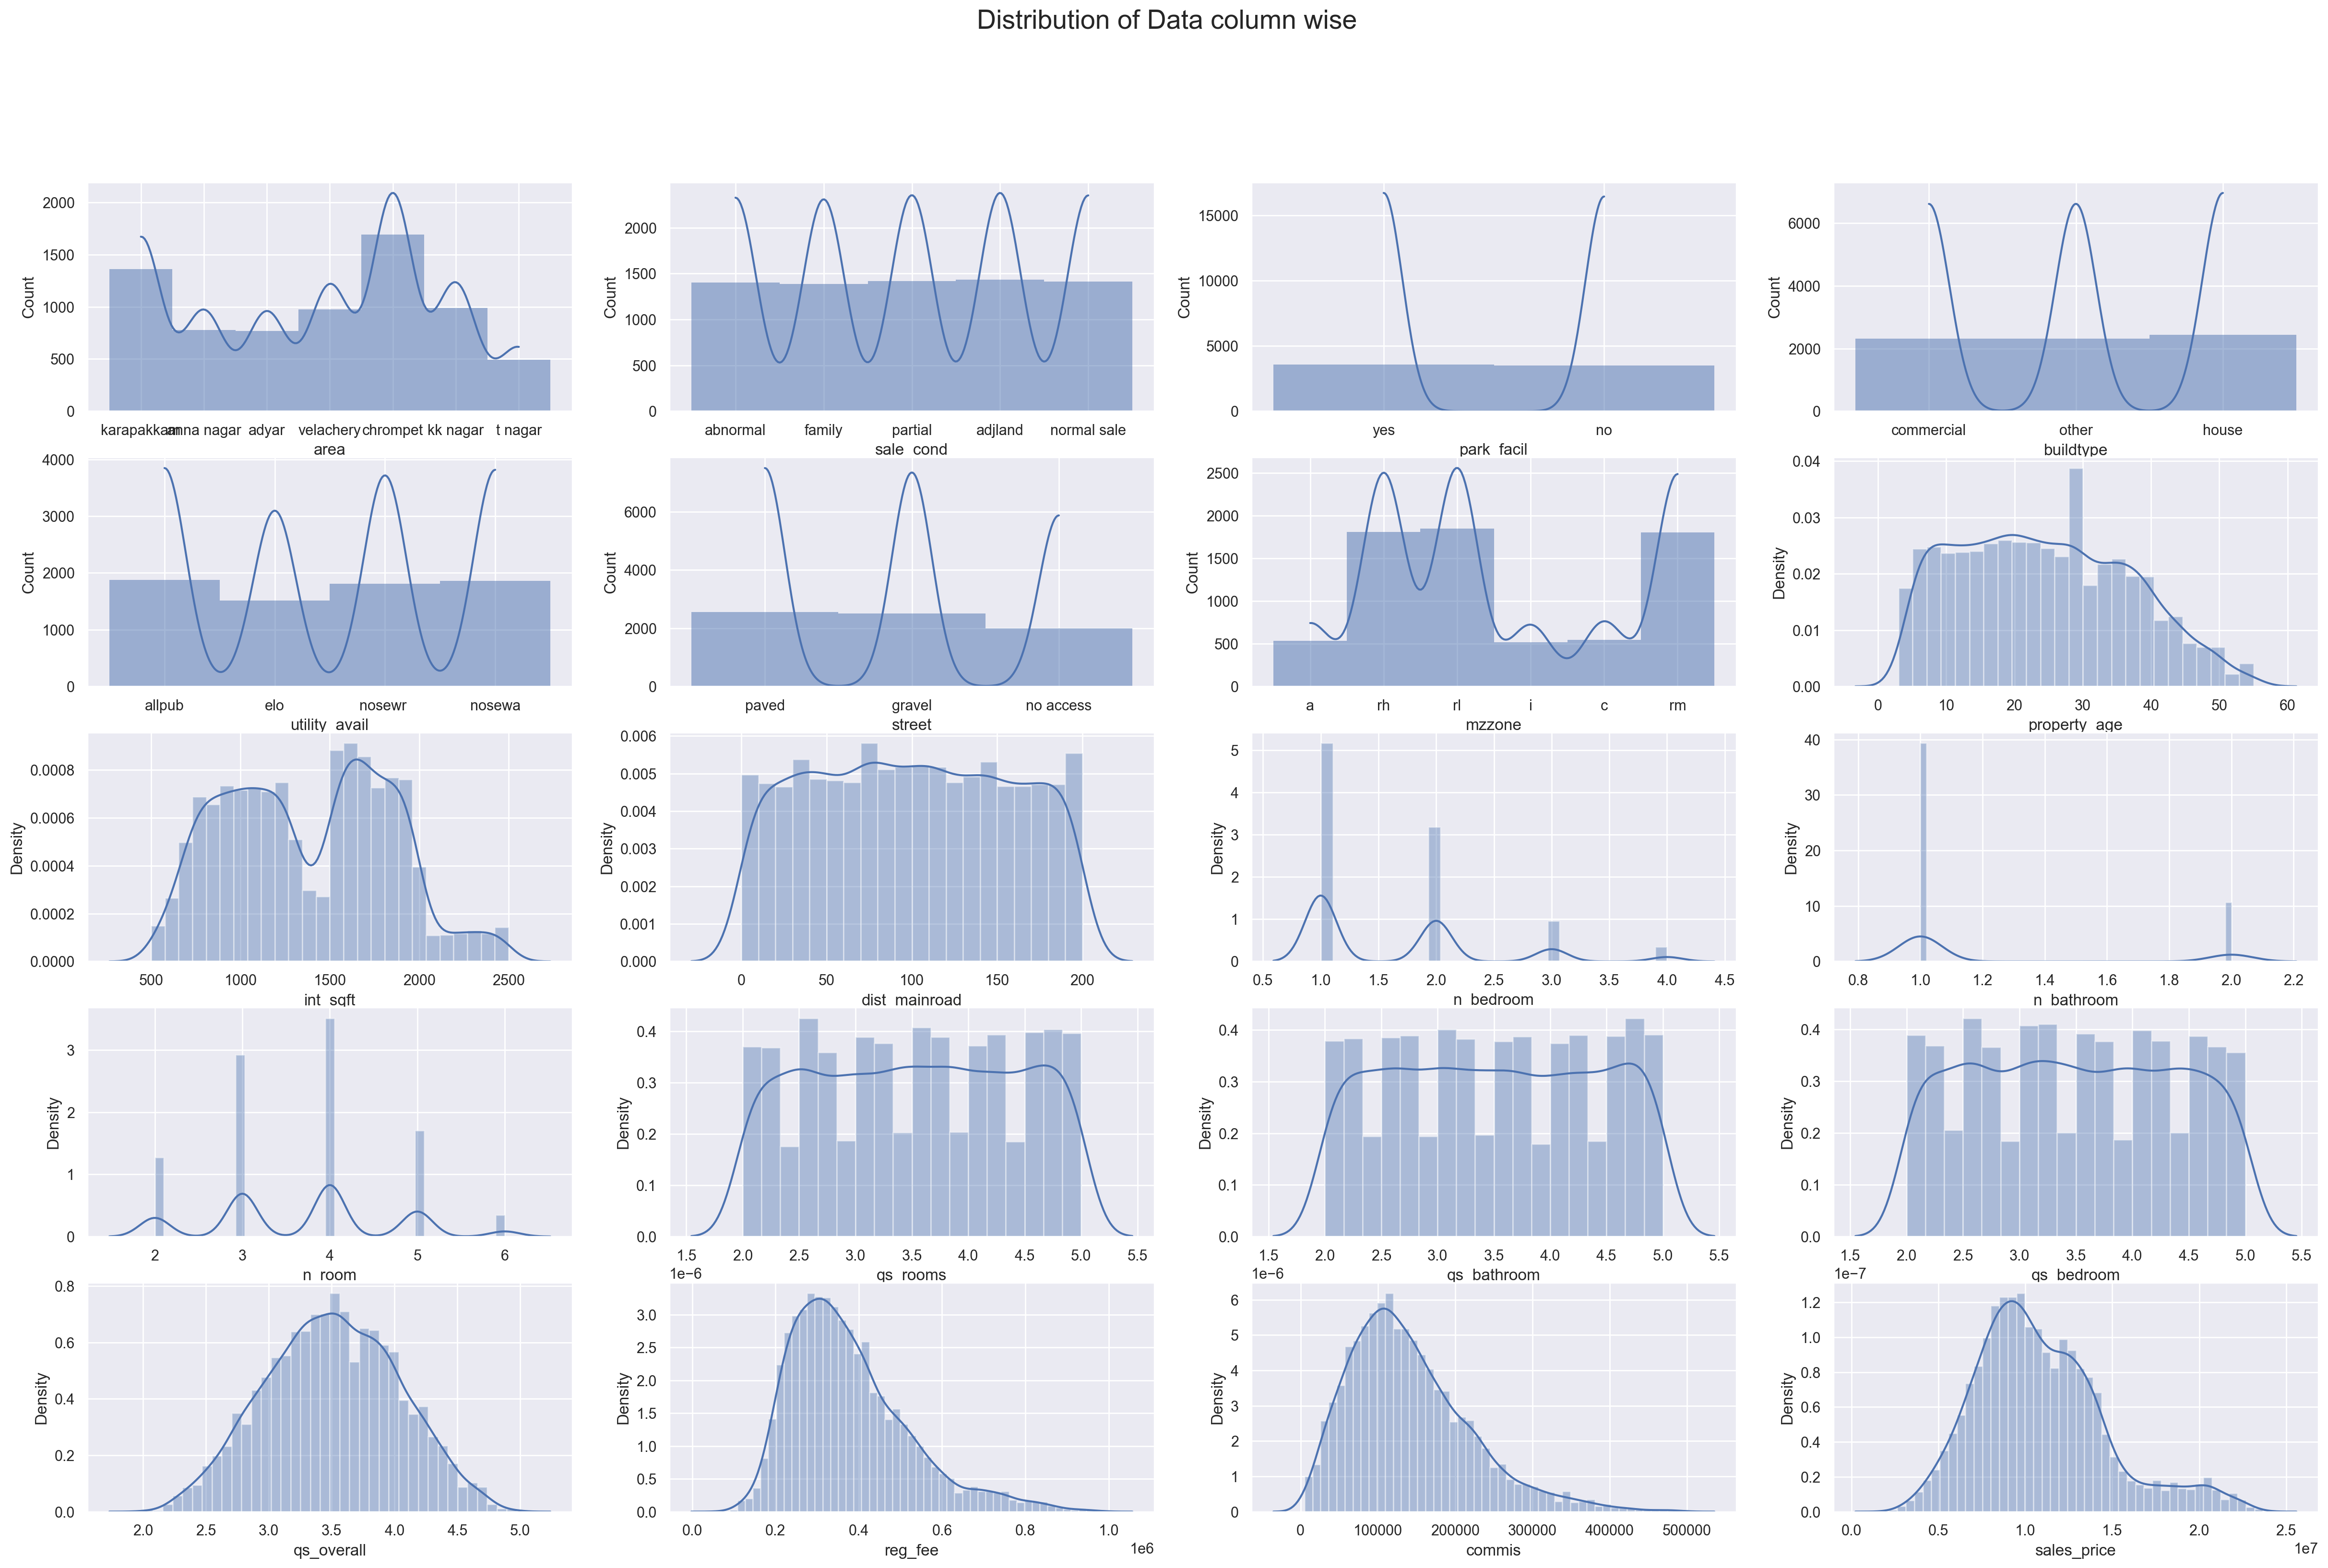

In [7]:
plt.figure(figsize=(30, 18), dpi=200)

plt.subplot(5,4,1)
sns.histplot(data.area, linewidth=0,kde=True)

plt.subplot(5,4,2)
sns.histplot(data.sale_cond, linewidth=0,kde=True)

plt.subplot(5,4,3)
sns.histplot(data.park_facil, linewidth=0,kde=True)

plt.subplot(5,4,4)
sns.histplot(data.buildtype, linewidth=0,kde=True)

plt.subplot(5,4,5)
sns.histplot(data.utility_avail, linewidth=0,kde=True)

plt.subplot(5,4,6)
sns.histplot(data.street, linewidth=0,kde=True)

plt.subplot(5,4,7)
sns.histplot(data.mzzone, linewidth=0,kde=True)

plt.subplot(5,4,8)
sns.distplot(data.property_age)

plt.subplot(5,4,9)
sns.distplot(data.int_sqft)

plt.subplot(5,4,10)
sns.distplot(data.dist_mainroad)

plt.subplot(5,4,11)
sns.distplot(data.n_bedroom)

plt.subplot(5,4,12)
sns.distplot(data.n_bathroom)

plt.subplot(5,4,13)
sns.distplot(data.n_room)

plt.subplot(5,4,14)
sns.distplot(data.qs_rooms)

plt.subplot(5,4,15)
sns.distplot(data.qs_bathroom)

plt.subplot(5,4,16)
sns.distplot(data.qs_bedroom)

plt.subplot(5,4,17)
sns.distplot(data.qs_overall)

plt.subplot(5,4,18)
sns.distplot(data.reg_fee)

plt.subplot(5,4,19)
sns.distplot(data.commis)

plt.subplot(5,4,20)
sns.distplot(data.sales_price)

plt.suptitle("Distribution of Data column wise", fontsize=20)
plt.show()

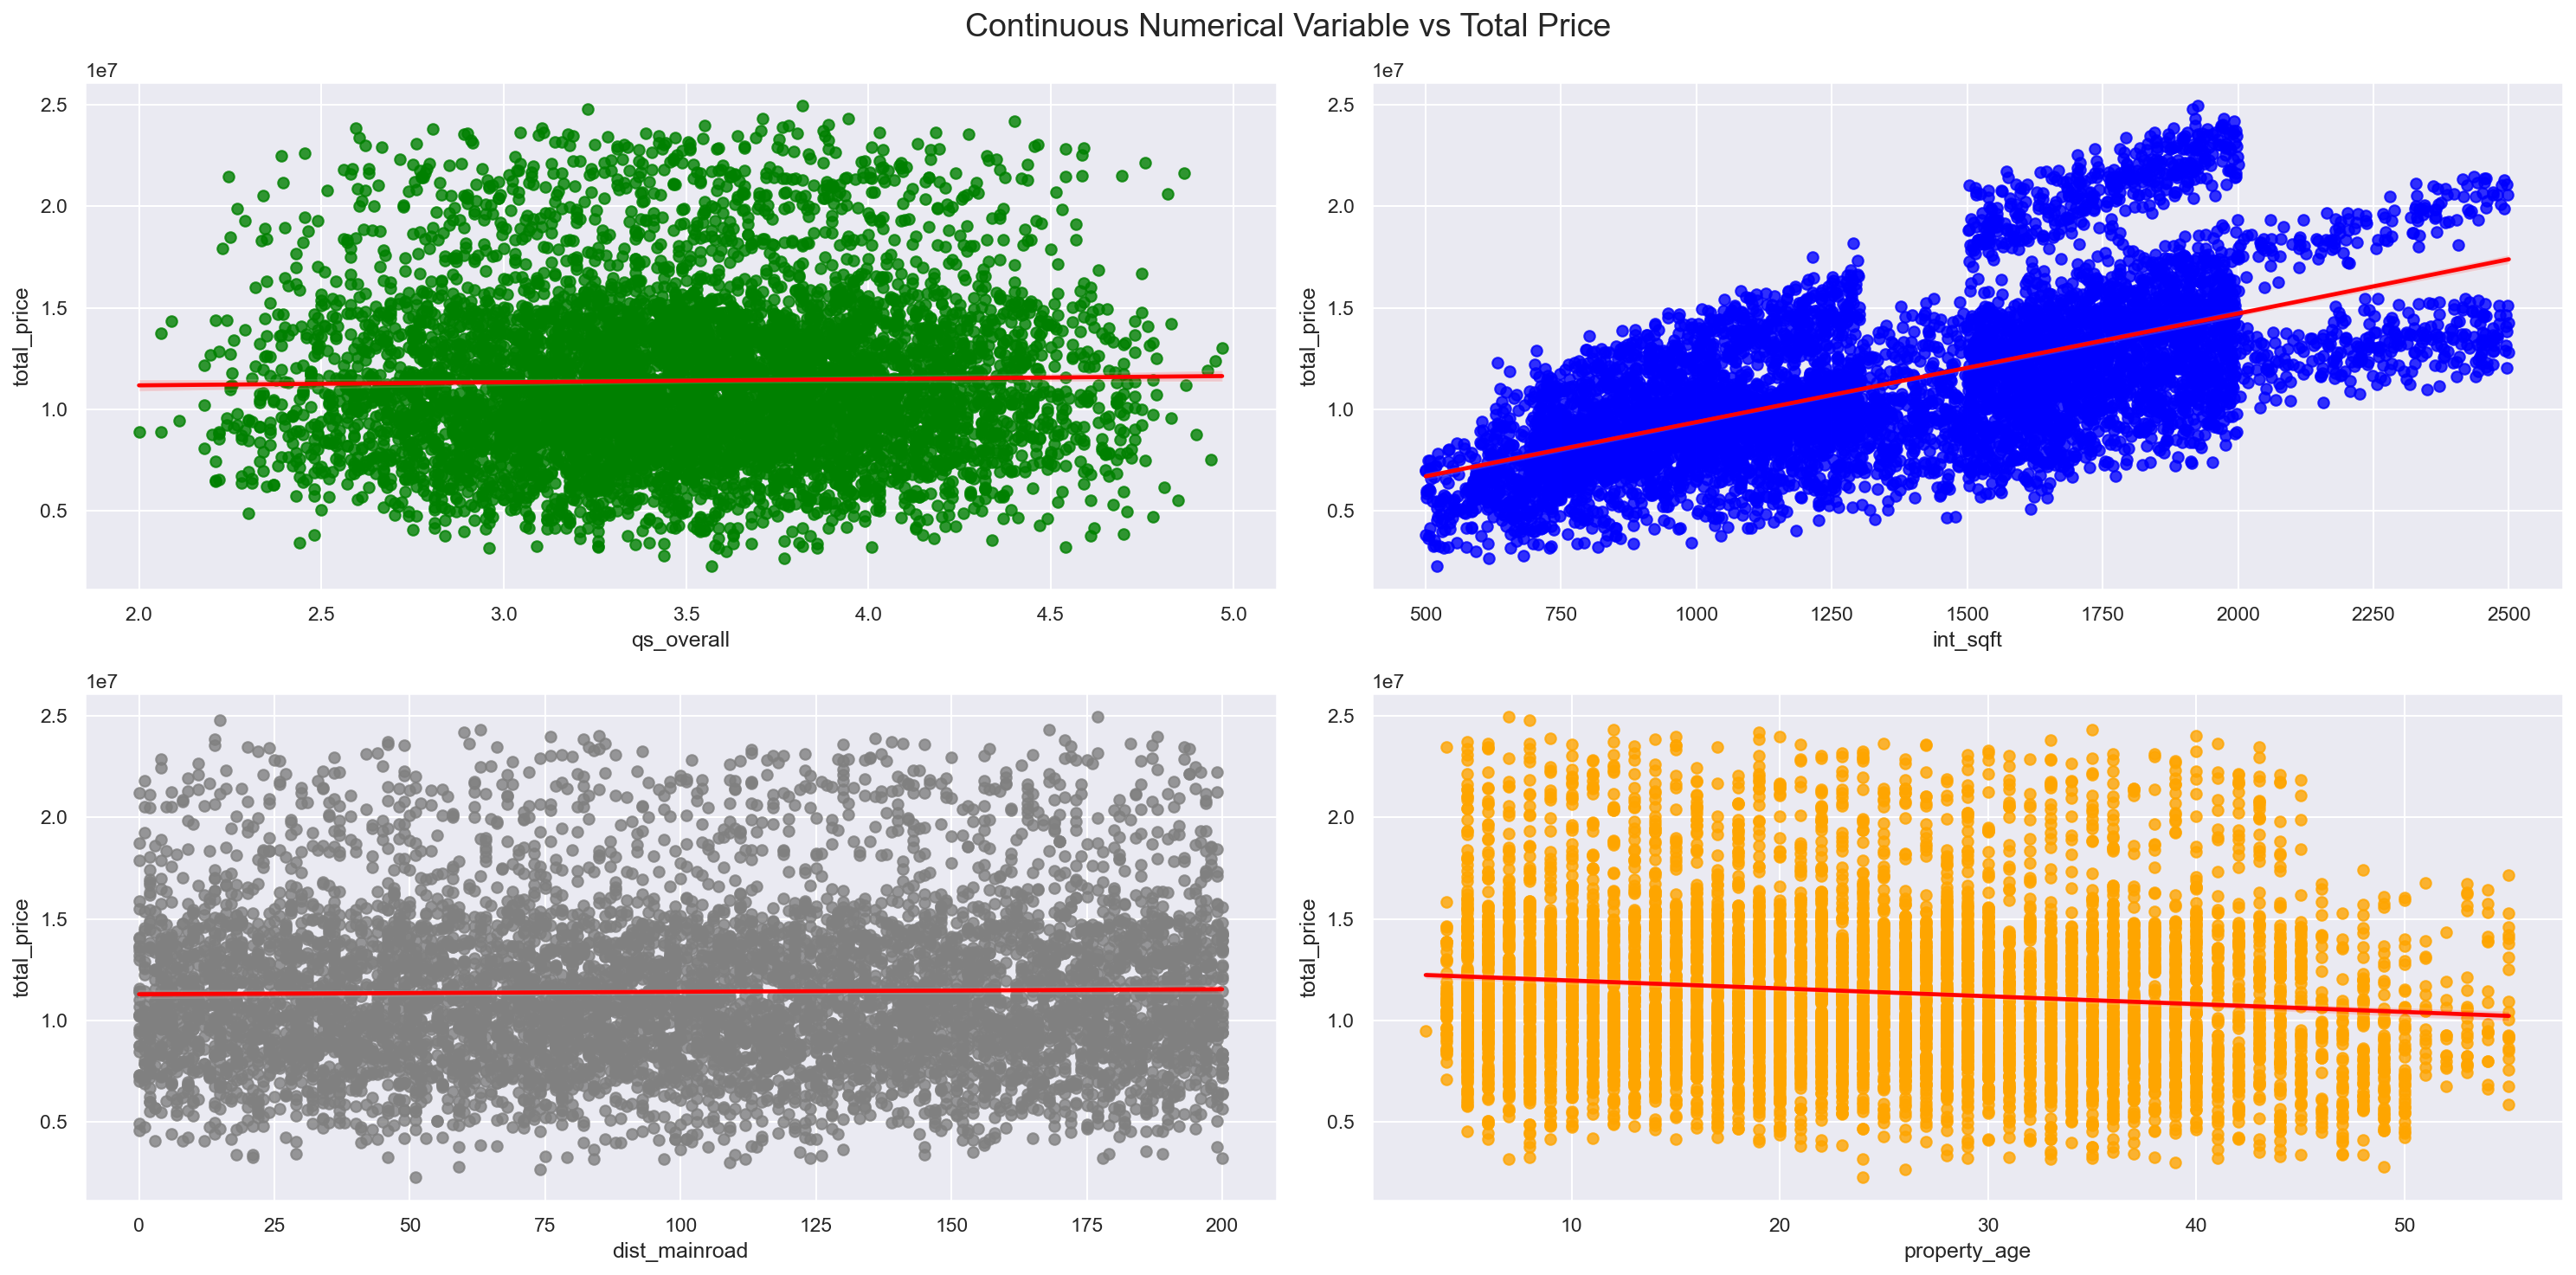

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2, 2, 1)
sns.regplot(x='qs_overall', y='total_price', data=data, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot(2, 2, 2)
sns.regplot(x='int_sqft', y='total_price', data=data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(2, 2, 3)
sns.regplot(x='dist_mainroad', y='total_price', data=data, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(2, 2, 4)
sns.regplot(x='property_age', y='total_price', data=data, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.suptitle("Continuous Numerical Variable vs Total Price", fontsize=18)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


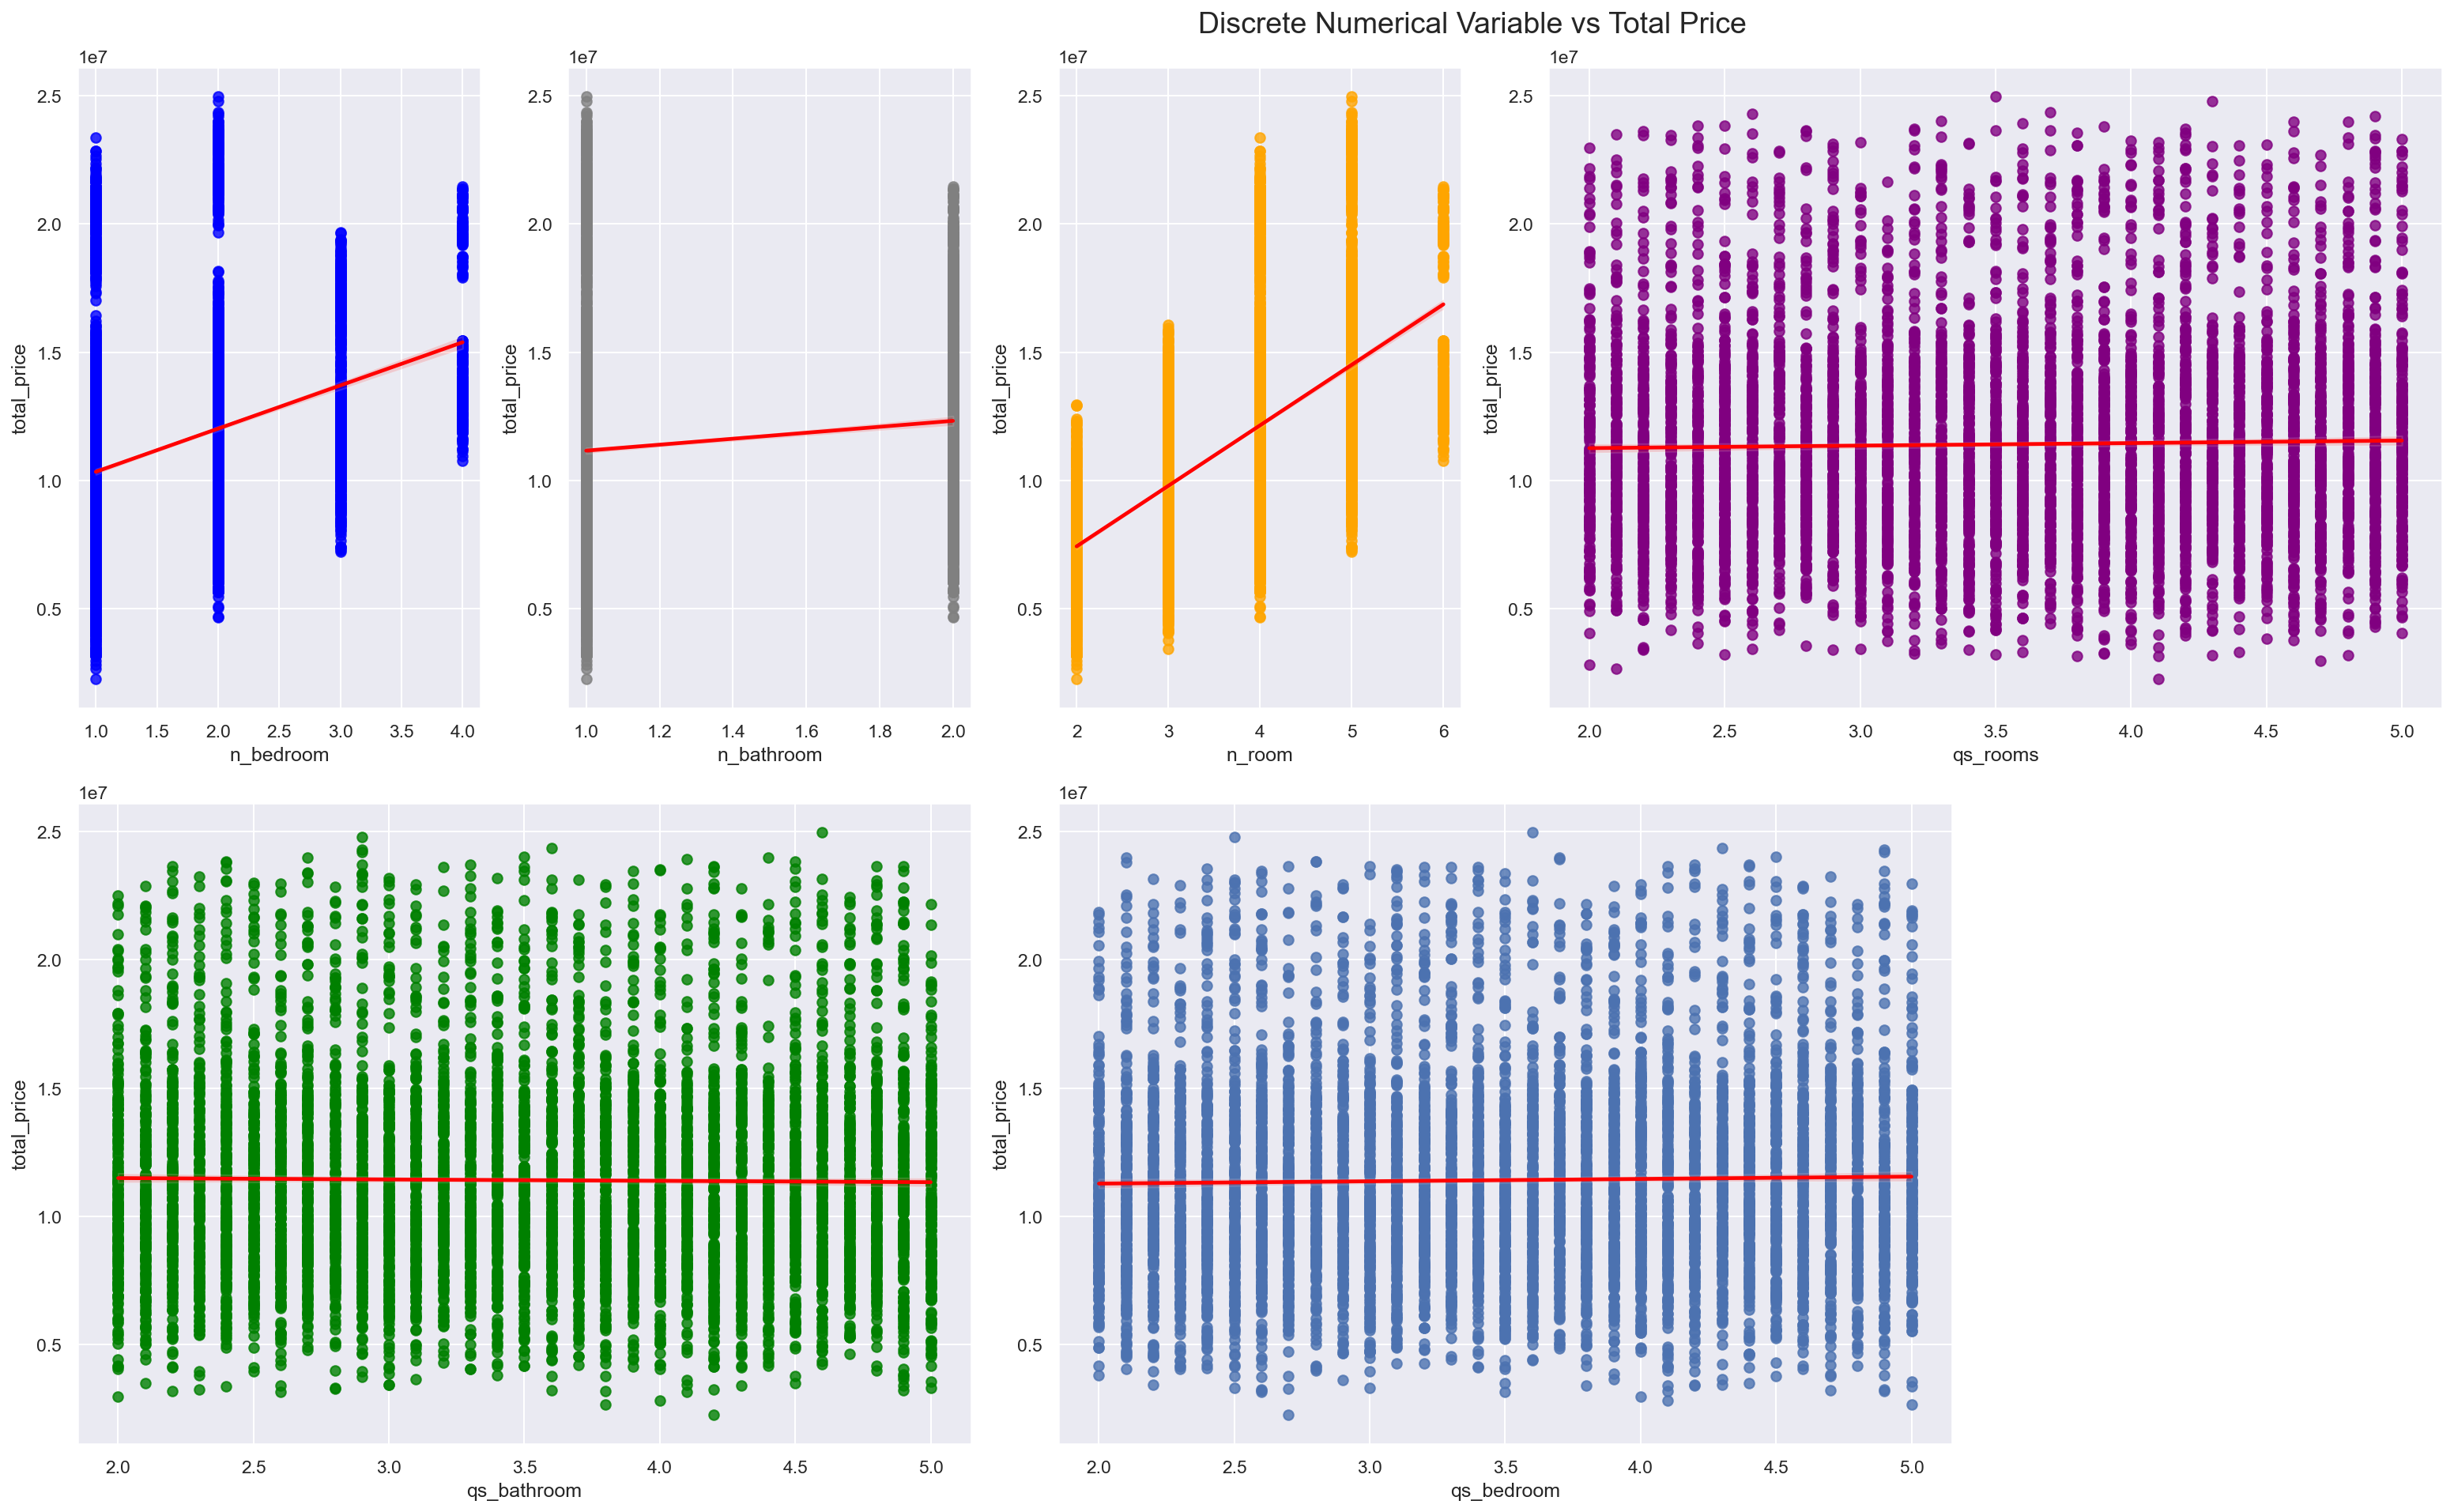

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2, 6), (0, 0))
sns.regplot(x='n_bedroom', y='total_price', data=data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot2grid((2, 6), (0, 1))
sns.regplot(x='n_bathroom', y='total_price', data=data, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot2grid((2, 6), (0, 2))
sns.regplot(x='n_room', y='total_price', data=data, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot2grid((2, 6), (0, 3), colspan=2)
sns.regplot(x='qs_rooms', y='total_price', data=data, scatter_kws={"color": "purple"}, line_kws={"color": "red"})

plt.subplot2grid((2, 6), (1, 0), colspan=2)
sns.regplot(x='qs_bathroom', y='total_price', data=data, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot2grid((2, 6), (1, 2), colspan=2)
sns.regplot(x='qs_bedroom', y='total_price', data=data, line_kws={"color": "red"})

plt.suptitle("Discrete Numerical Variable vs Total Price", fontsize=18)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


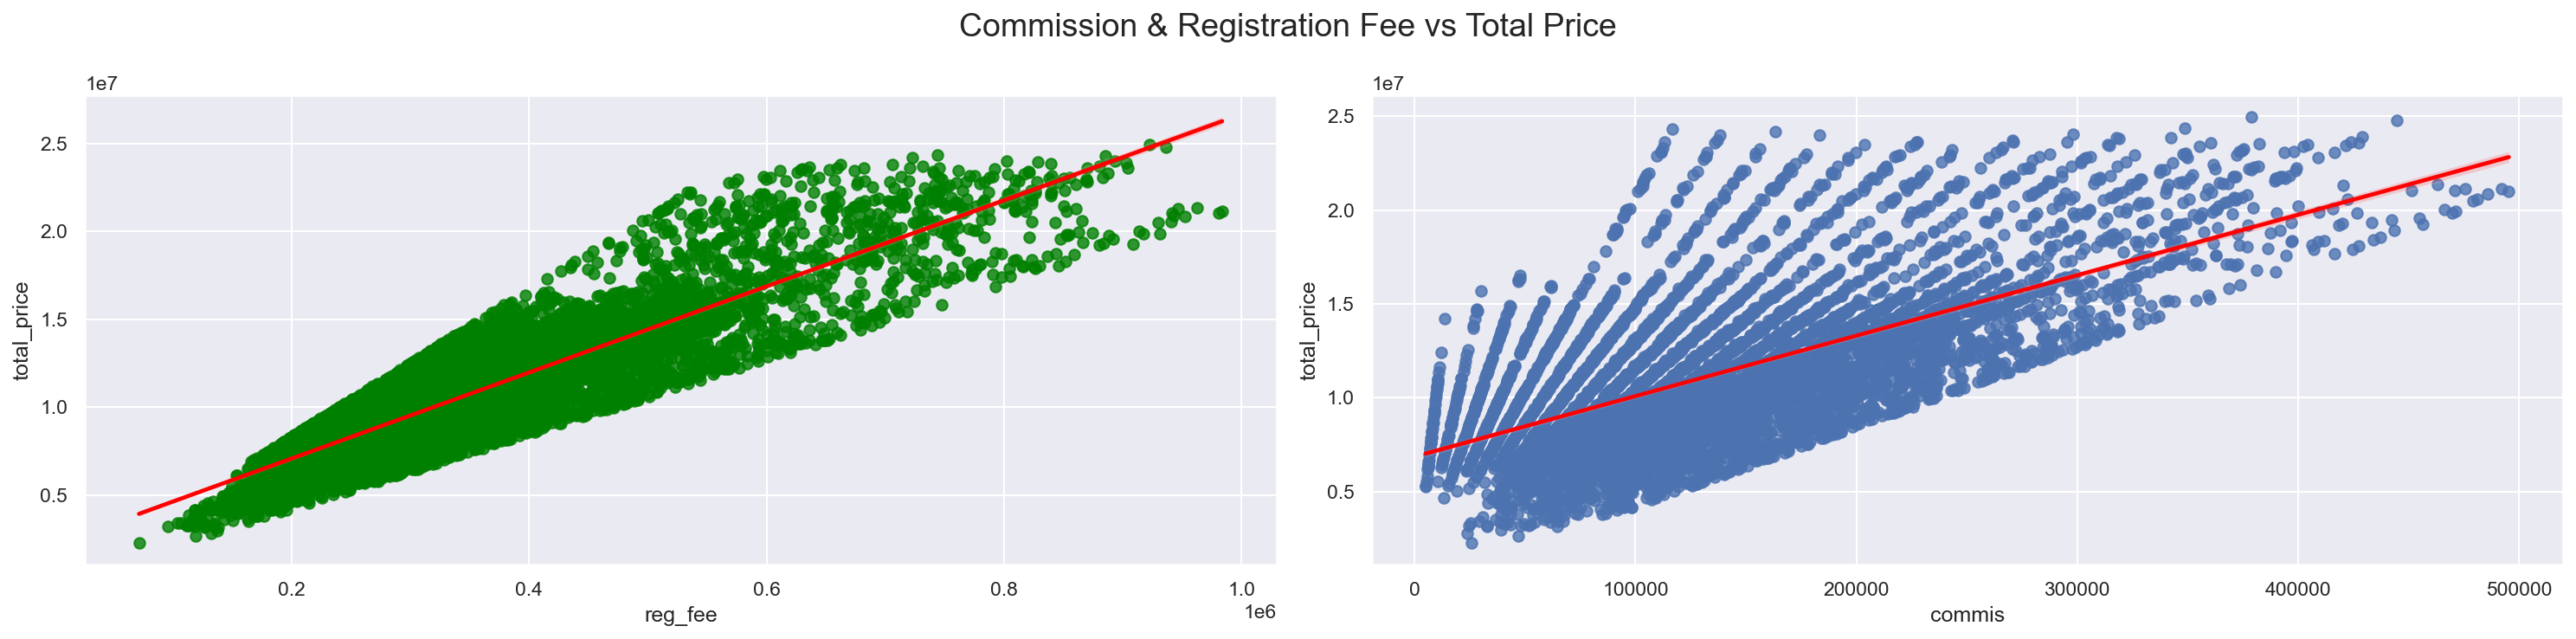

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5), dpi=150)

# Plot for registration fee vs total price
plt.subplot(1, 2, 1)
sns.regplot(x='reg_fee', y='total_price', data=data, scatter_kws={"color": "green"}, line_kws={"color": "red"})

# Plot for commission vs total price
plt.subplot(1, 2, 2)
sns.regplot(x='commis', y='total_price', data=data, line_kws={"color": "red"})

plt.suptitle("Commission & Registration Fee vs Total Price", fontsize=18)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


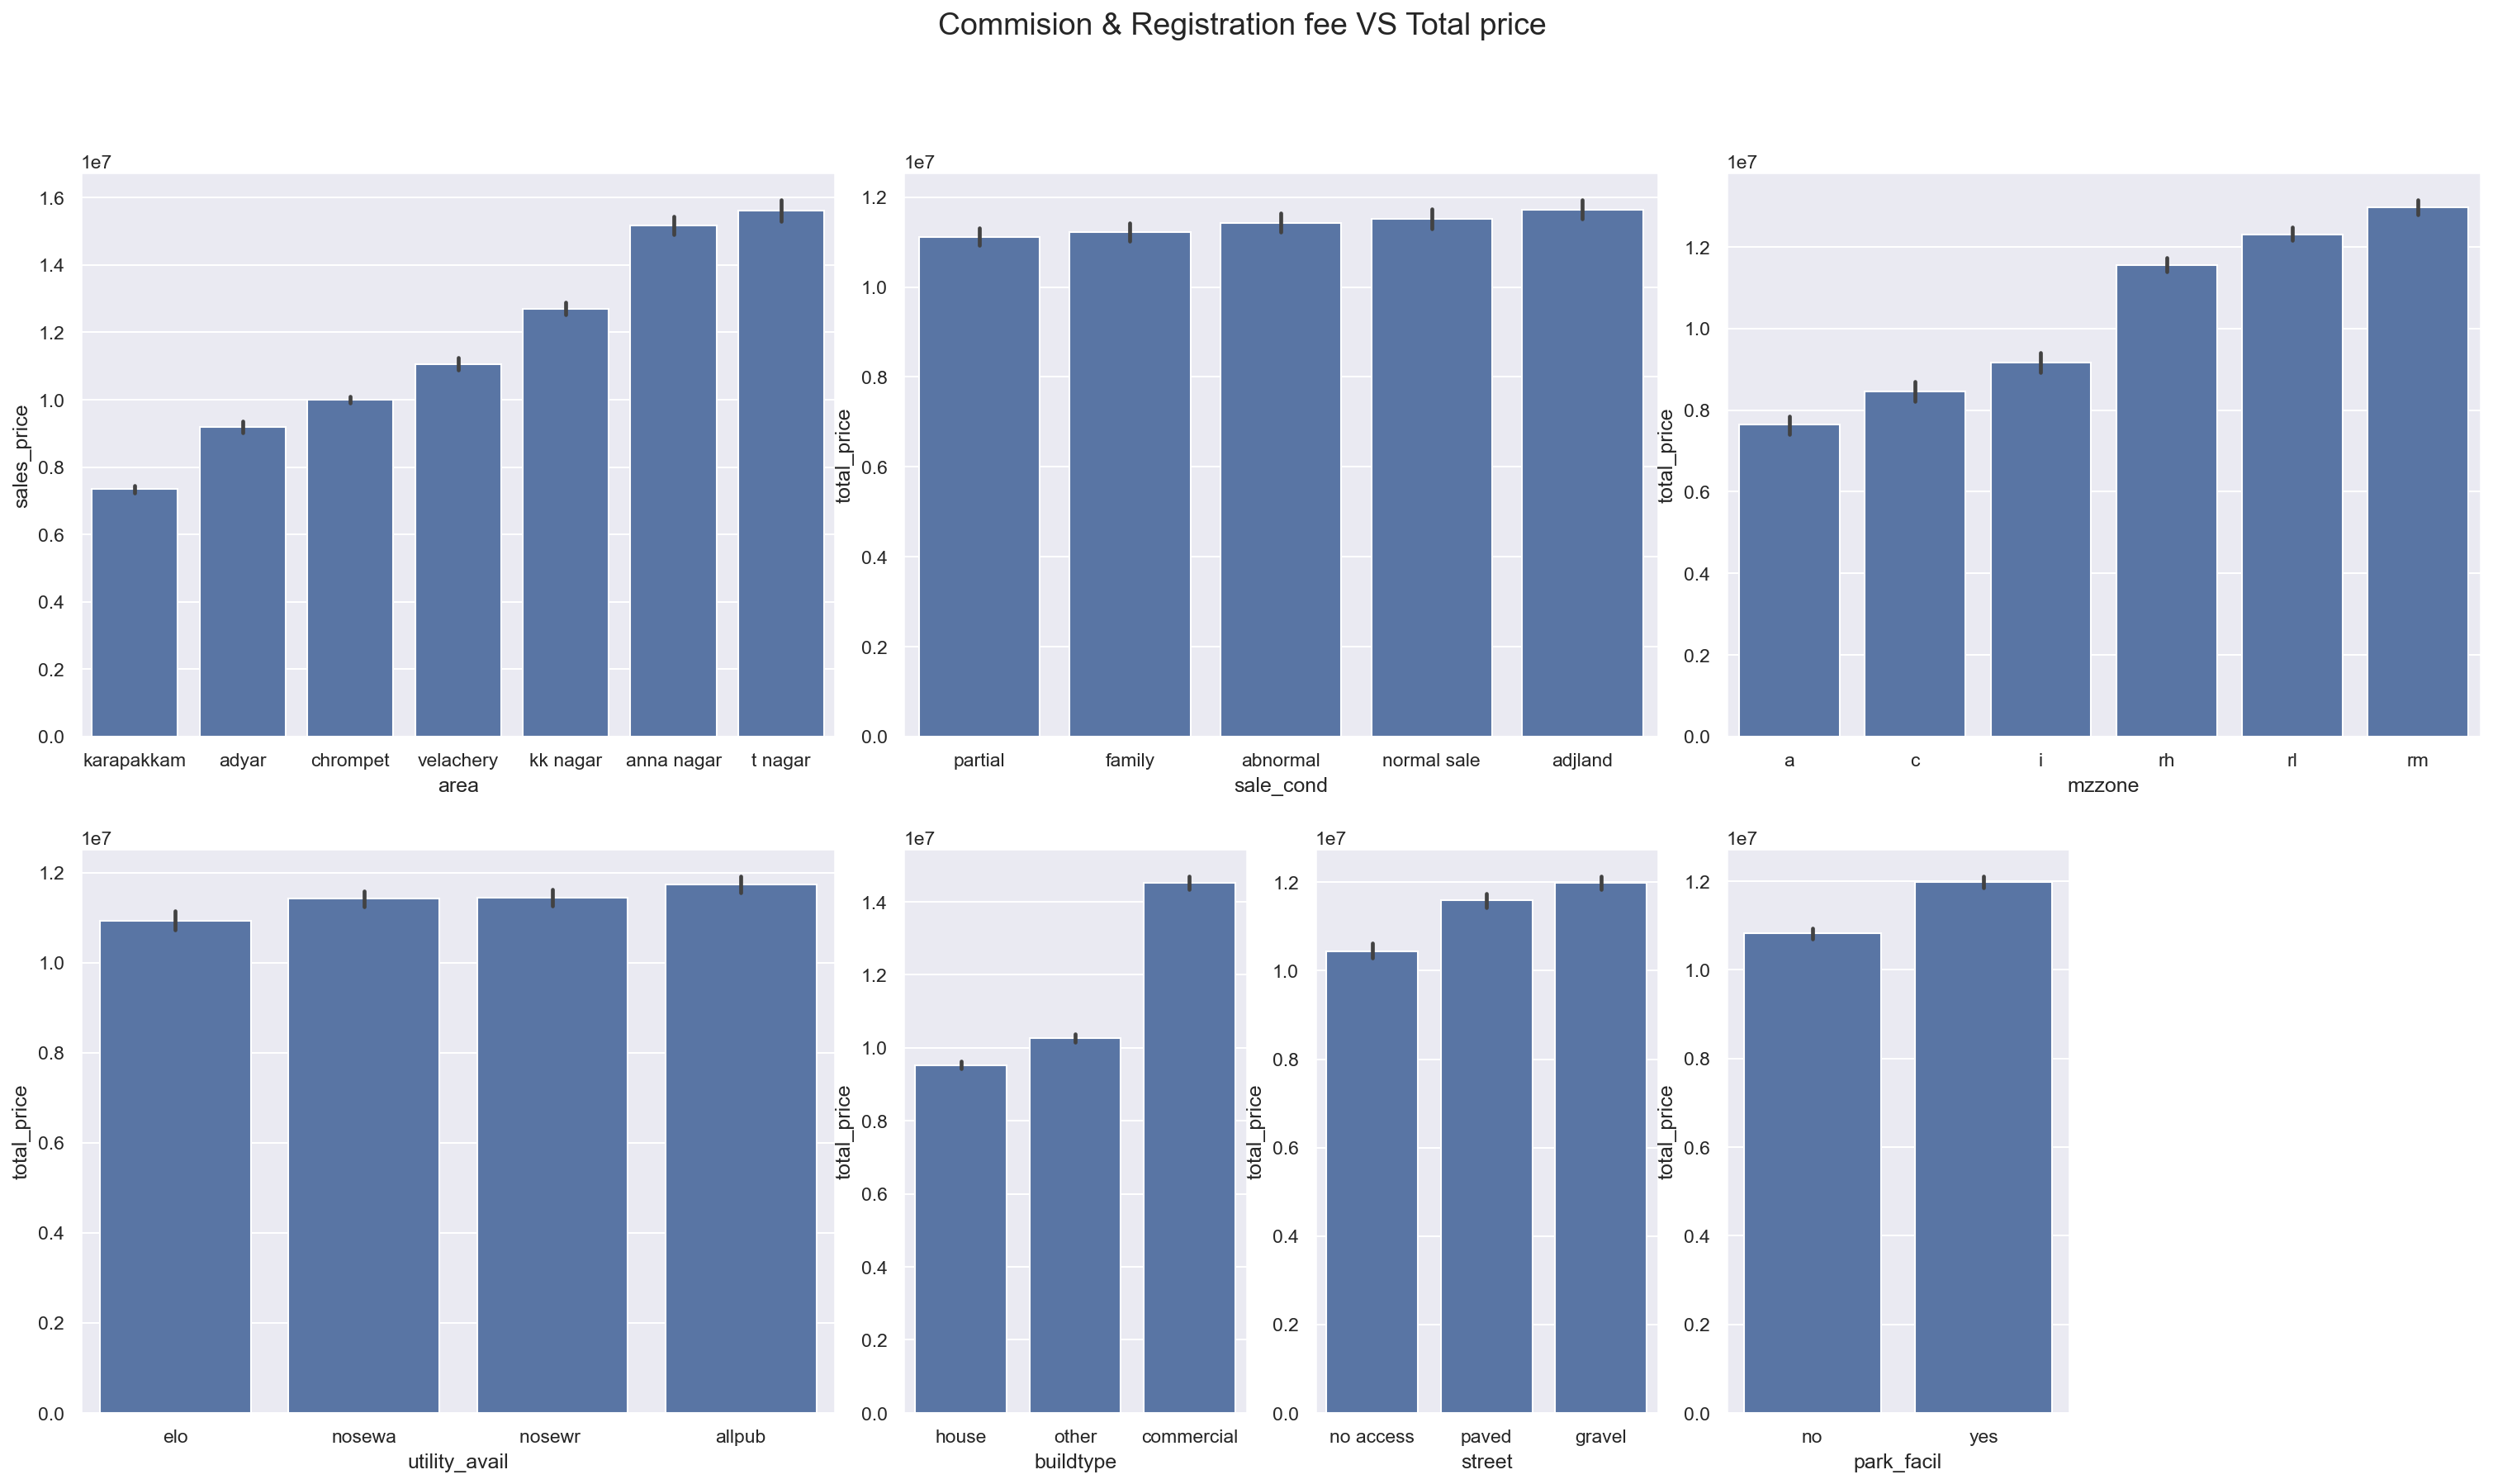

In [11]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0),colspan=2)
sns.barplot(x=data.area,y=data.sales_price,order=data.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area'])

plt.subplot2grid((2,6),(0,2),colspan=2)
sns.barplot(x=data.sale_cond,y=data.total_price,order=data.groupby('sale_cond')['total_price'].mean().reset_index().sort_values('total_price')['sale_cond'])

plt.subplot2grid((2,6),(0,4),colspan=2)
sns.barplot(x=data.mzzone,y=data.total_price,order=data.groupby('mzzone')['total_price'].mean().reset_index().sort_values('total_price')['mzzone'])

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.barplot(x=data.utility_avail,y=data.total_price,order=data.groupby('utility_avail')['total_price'].mean().reset_index().sort_values('total_price')['utility_avail'])

plt.subplot2grid((2,6),(1,2))
sns.barplot(x=data.buildtype,y=data.total_price,order=data.groupby('buildtype')['total_price'].mean().reset_index().sort_values('total_price')['buildtype'])

plt.subplot2grid((2,6),(1,3))
sns.barplot(x=data.street,y=data.total_price,order=data.groupby('street')['total_price'].mean().reset_index().sort_values('total_price')['street'])

plt.subplot2grid((2,6),(1,4))
sns.barplot(x=data.park_facil,y=data.total_price,order=data.groupby('park_facil')['total_price'].mean().reset_index().sort_values('total_price')['park_facil'])

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

In [12]:
data = pd.get_dummies(data,columns=['buildtype'])

In [13]:
# Encoding the area column order-wise 
data.area = data.area.map({'karapakkam': 1,
                           'adyar': 2, 
                           'chrompet' : 3,
                           'velachery' : 4,
                           'kk nagar' : 5, 
                           'anna nagar' : 6,
                           't nagar' : 7})

# Encoding the sale_cond column order-wise 
data.sale_cond = data.sale_cond.map({'partial' : 1, 
                                     'family' : 2, 
                                     'abnormal' : 3, 
                                     'normal sale' : 4,
                                     'adjland' : 5})

# Encoding the park_facil column order-wise 
data.park_facil = data.park_facil.map({'yes':1,
                                       'no':0})

# Encoding the utility_avail column order-wise 
data.utility_avail = data.utility_avail.map({'elo' : 1, 
                                             'nosewa' : 2, 
                                             'nosewr ' : 3,
                                             'allpub' : 4})
                                          
# Encoding the street column order-wise 
data.street = data.street.map({'no access' : 1,
                               'paved' : 2, 
                               'gravel' : 3})


# Encoding the mzzone column order-wise 
data.mzzone = data.mzzone.map({'a' : 1,
                               'c' : 2,
                               'i' : 3,
                               'rl' : 5,
                               'rh' : 4,
                               'rm' : 6})

In [14]:
# Removing unnecessary columns and Rearranging the columns of dataframe 
data = data.reindex(columns = ['area', 'sale_cond', 'park_facil',
       'buildtype_commercial', 'buildtype_house','buildtype_other', 'utility_avail',
       'street', 'mzzone', 'property_age', 'int_sqft', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'qs_rooms', 'qs_bathroom', 'qs_bedroom',
        'qs_overall', 'reg_fee', 'commis', 'sales_price', 'total_price'])

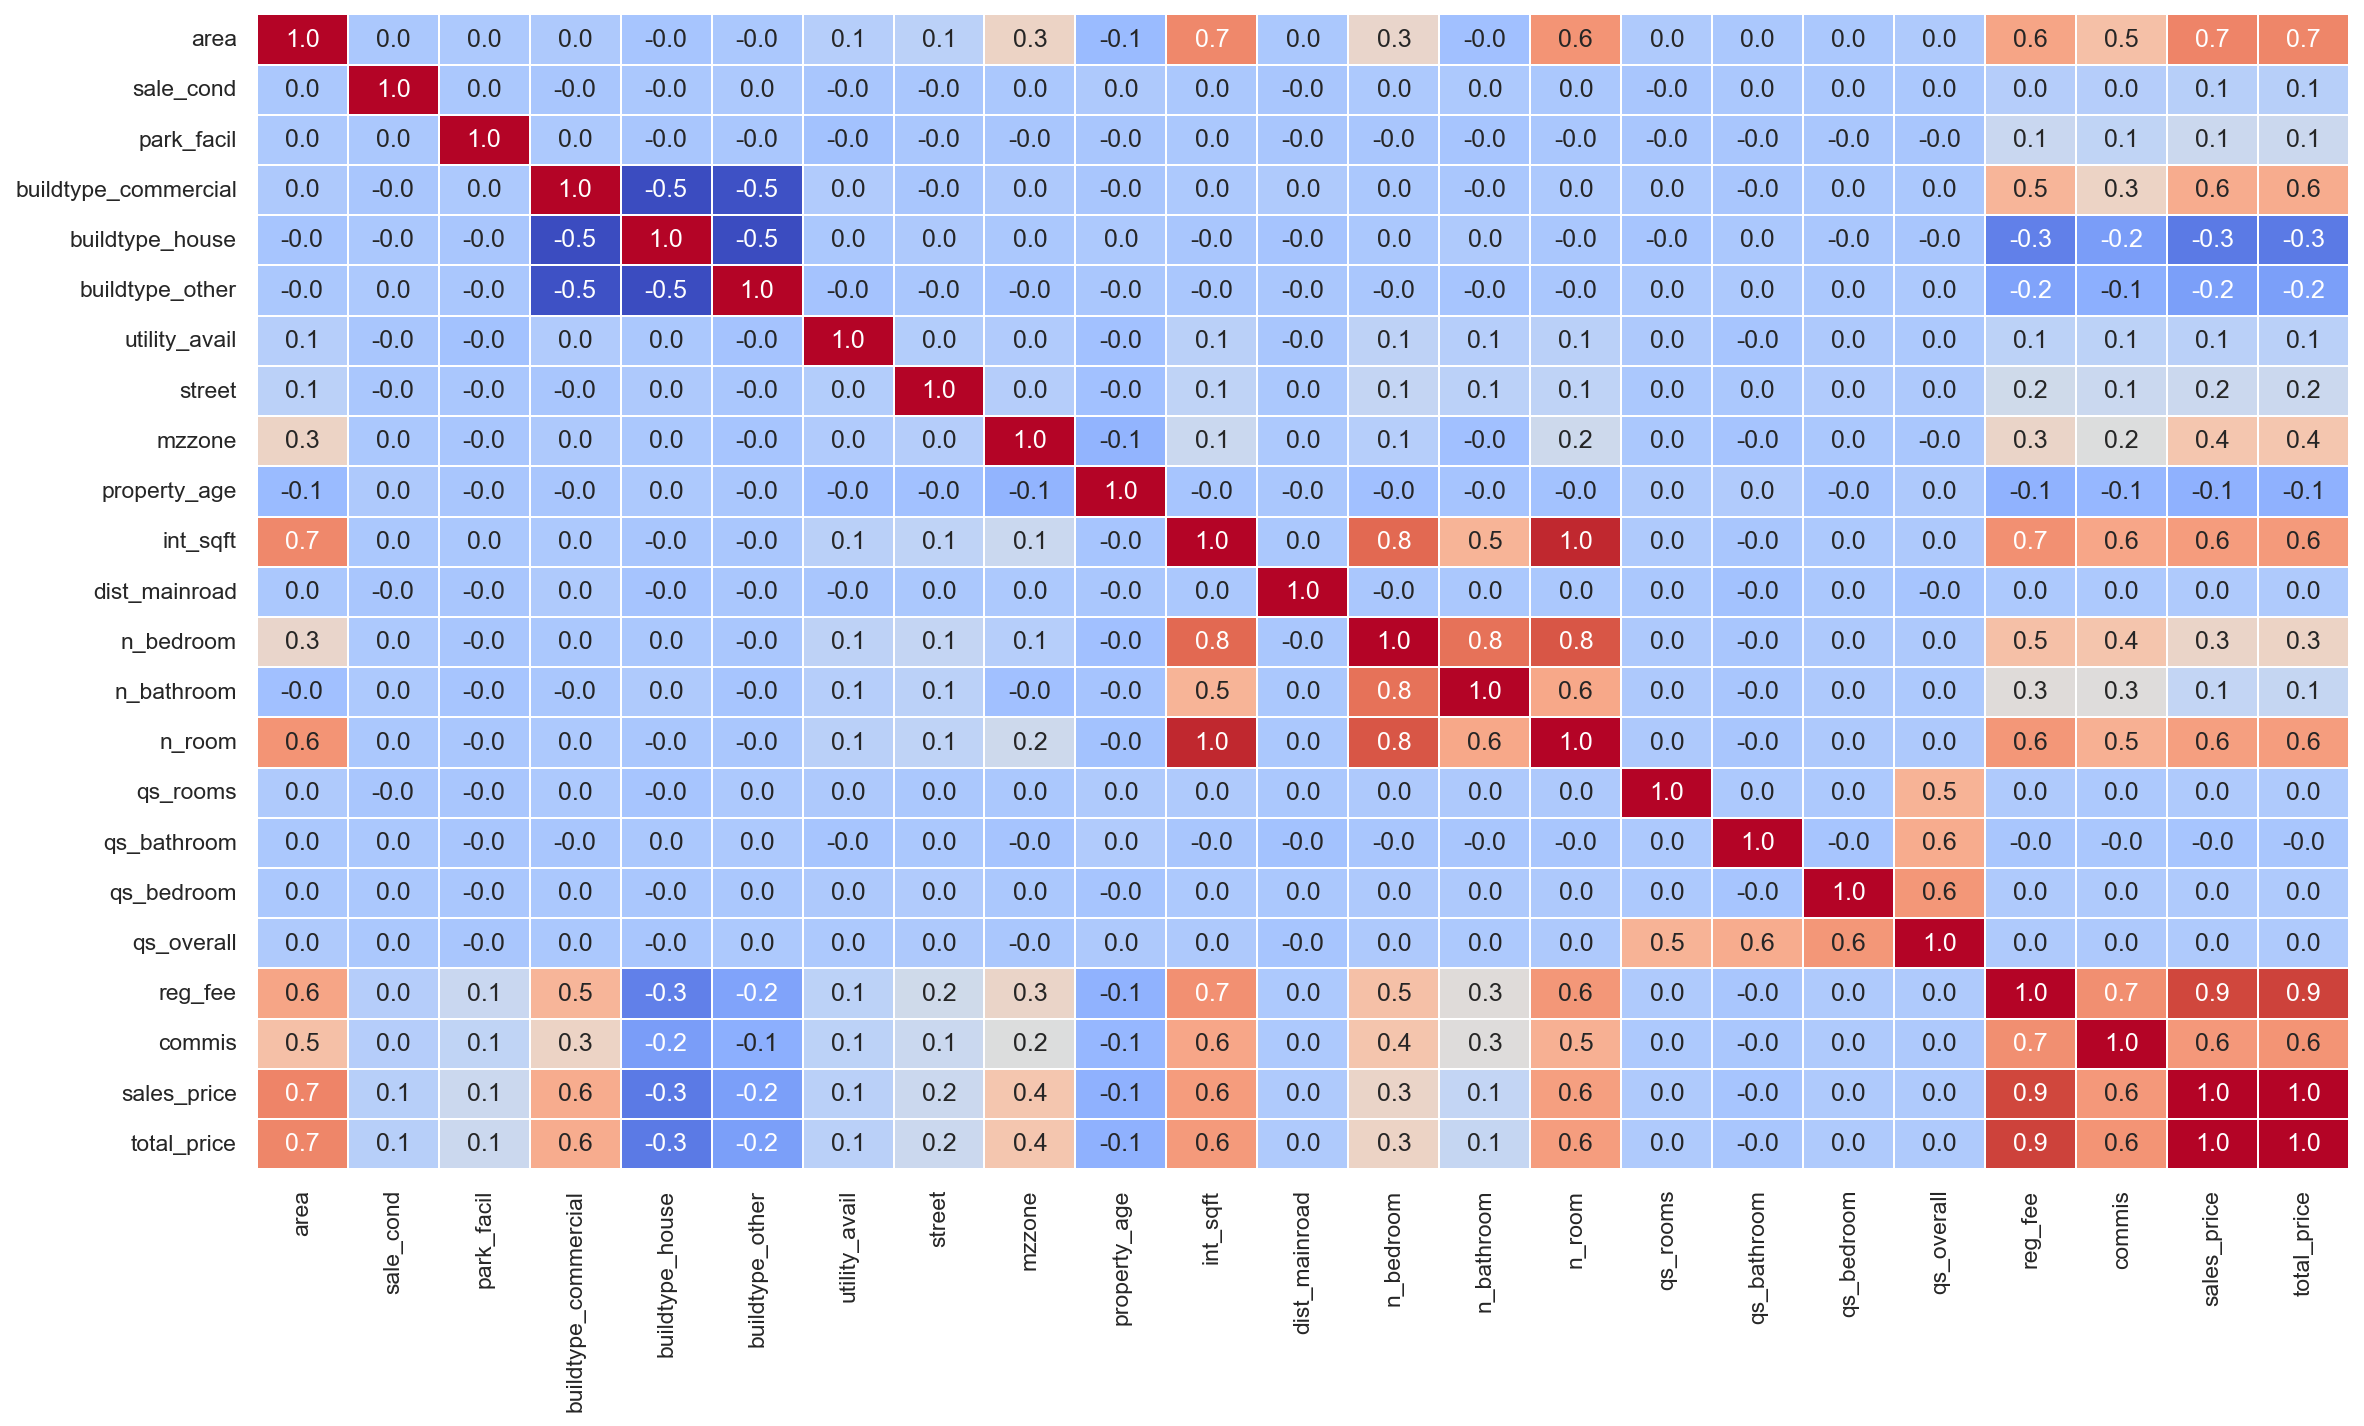

In [15]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(data.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

In [16]:
data.head(3)

area  sale_cond  park_facil  buildtype_commercial  buildtype_house  \
0     1          3           1                  True            False   
1     6          3           0                  True            False   
2     2          3           1                  True            False   

   buildtype_other  utility_avail  street  mzzone  property_age  int_sqft  \
0            False              4       2       1            44      1004   
1            False              4       3       4            11      1986   
2            False              1       3       5            20       909   

   dist_mainroad  n_bedroom  n_bathroom  n_room  qs_rooms  qs_bathroom  \
0            131          1           1       3       4.0          3.9   
1             26          2           1       5       4.9          4.2   
2             70          1           1       3       4.1          3.8   

   qs_bedroom  qs_overall  reg_fee  commis  sales_price  total_price  
0         4.9       4.330   380000  144400      7600000      8124400  
1         2.5       3.765   760122  304049     21717770     22781941  
2         2.2       3.090   421094   92114     13159200     13672408

In [17]:
# Removing unnecessary features thich has negligible relation with total_price
df = data.copy()
df.drop(['qs_overall', 'dist_mainroad', 'qs_overall','qs_rooms', 'qs_bathroom', 'qs_bedroom', 'reg_fee',	'commis'], axis=1, inplace=True)

In [18]:
input_cols = ['area', 'sale_cond', 'park_facil', 'buildtype_commercial',	'buildtype_house',
              'buildtype_other', 'utility_avail', 'street', 'mzzone', 'property_age',
              'int_sqft', 'n_bedroom', 'n_bathroom', 'n_room']

target_cols = 'sales_price'
target1_cols = 'total_price'

input = df[input_cols].copy()
target = df[target_cols].copy()
target1 = df[target1_cols].copy()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state = 7)

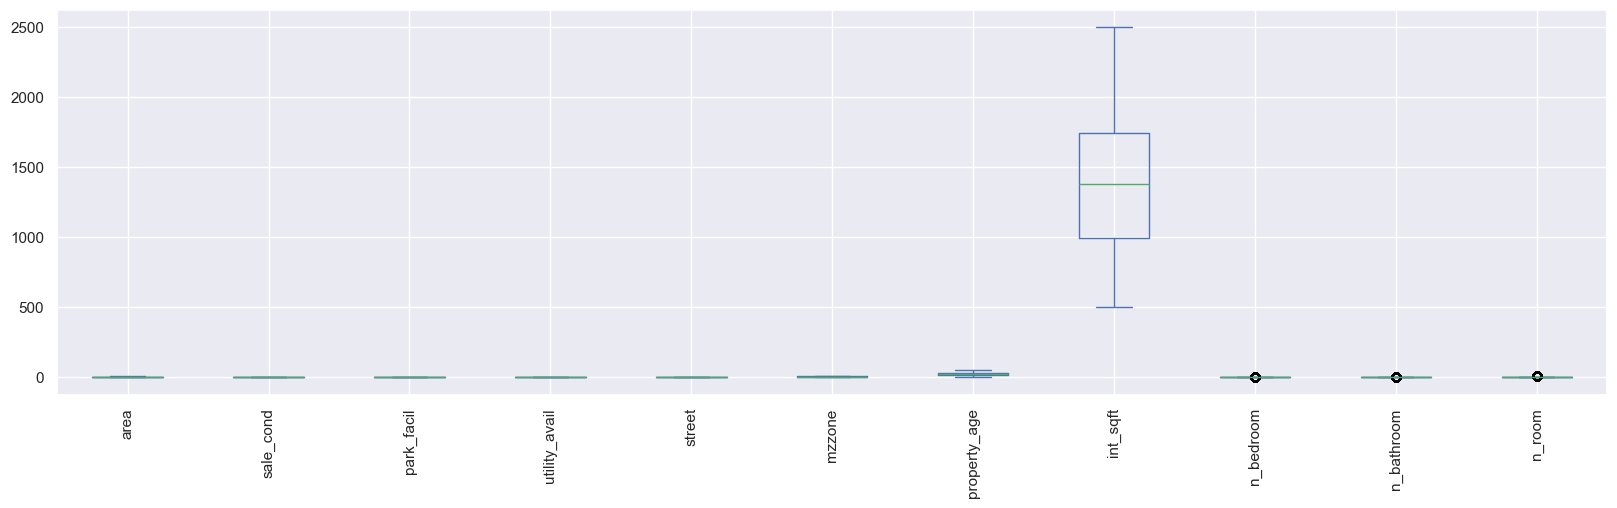

In [20]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()

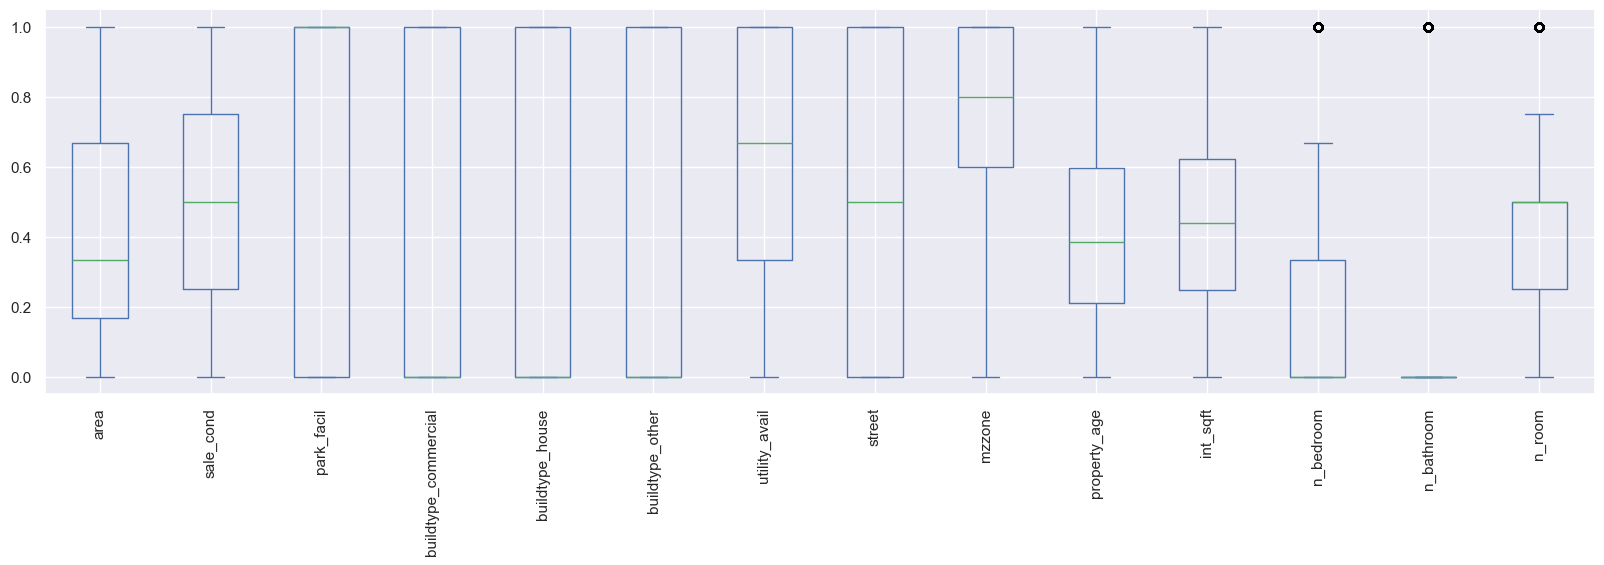

In [21]:
mm = MinMaxScaler().fit(X_train)
X_train_mm = mm.transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns=X_train.columns)
X_test_mm = mm.transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=X_test.columns)
X_train_mm.plot.box(figsize=(20,5), rot=90)
plt.show()

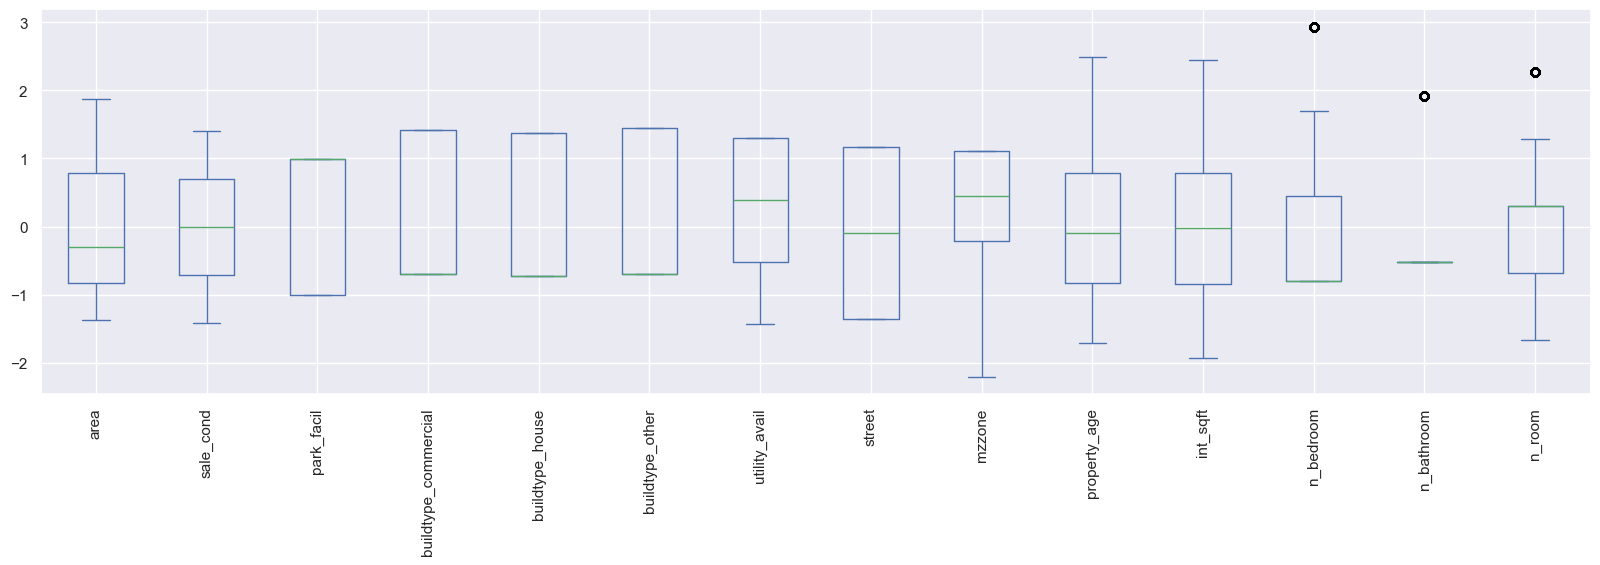

In [22]:
ss = StandardScaler().fit(X_train)
X_train_ss = ss.transform(X_train)
X_train_ss = pd.DataFrame(X_train_ss, columns=X_train.columns)
X_test_ss = ss.transform(X_test)
X_test_ss = pd.DataFrame(X_test_ss, columns=X_test.columns)
X_train_ss.plot.box(figsize=(20,5), rot=90)
plt.show()

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

# lr = LinearRegression()
lr.fit(X_train_ss, y_train)
y_predlrss = lr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predlrss))

# lr = LinearRegression()
lr.fit(X_train_mm, y_train)
y_predlrmm = lr.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predlrmm))

R2- SCORE: 0.923424259980204
R2- SCORE(Standardscaler): 0.9236060407076915
R2- SCORE(Minmaxscaled): 0.9234145432262099


Orange and Blue depict RSME for MinMaxScaler and blue


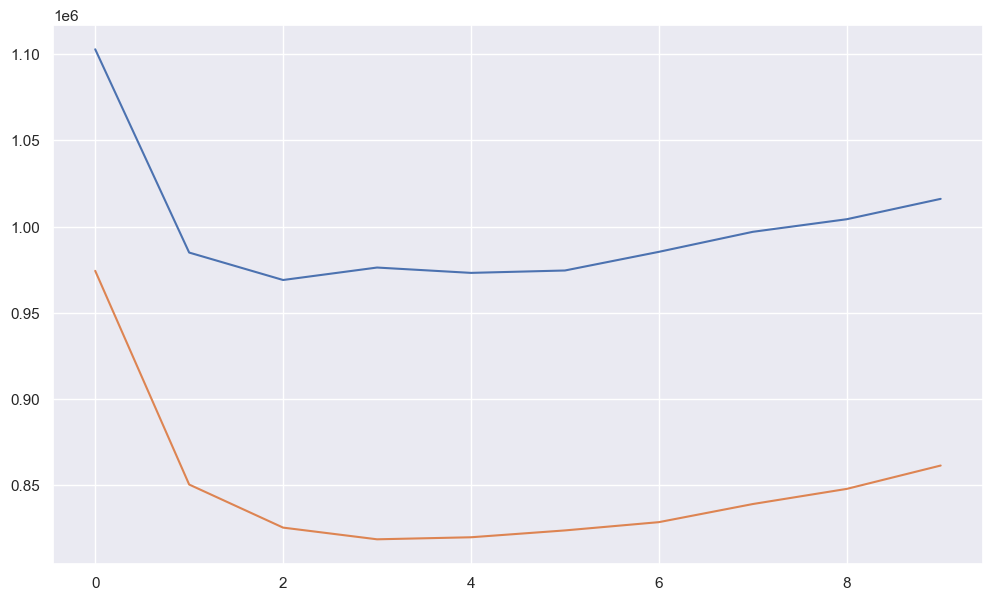

In [24]:
rmse_val = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train_mm, y_train)
    pred=model.predict(X_test_mm)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
curve = pd.DataFrame(rmse_val)

rmse_val1 = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train_ss, y_train)
    pred=model.predict(X_test_ss)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val1.append(error)
curve1 = pd.DataFrame(rmse_val1)

print('Orange and Blue depict RSME for MinMaxScaler and blue')
plt.figure(figsize=(12,7))
plt.plot(curve)
plt.plot(curve1)
plt.show()

In [25]:
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_predknn))

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_mm, y_train)
y_predknn_mm = knn.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predknn_mm))

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_ss, y_train)
y_predknn_ss = knn.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predknn_ss))

R2- SCORE: 0.4330688135537921
R2- SCORE(Minmaxscaled): 0.9338292932490762
R2- SCORE(Standardscaler): 0.9527770963012473


In [26]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_dt))

dt.fit(X_train_mm, y_train)
y_pred_dtmm = dt.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_pred_dtmm))

dt.fit(X_train_ss, y_train)
y_pred_dtss = dt.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_dtss))

R2- SCORE: 0.9743651050531342
R2- SCORE(Minmaxscaled): 0.9754585625302942
R2- SCORE(Standardscaler): 0.9753549344539968


In [27]:
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=100)
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
xg = xgb./(learning_rate = .7, n_estimators=100, verbosity = 0)
gbr = GradientBoostingRegressor(learning_rate=.5)
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)

vr = VotingRegressor([('dt', dt), ('knn', knn), ('lr', lr), ('rf', rf), ('xg', xg), ('gbr', gbr), ('etr', etr)])

vr.fit(X_train, y_train);
y_pred_vr = vr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_vr))

vr.fit(X_train_ss, y_train);
y_pred_vrss = vr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_vrss))

vr.fit(X_train_mm, y_train);
y_pred_vrmm = vr.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_vr))

R2- SCORE: 0.9787938132013443
R2- SCORE(Standardscaler): 0.989580883315923
R2- SCORE(MinMaxScaler): 0.9787938132013443


In [28]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
rf.fit(X_train, y_train);
y_pred_rf = rf.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_rf))

rf.fit(X_train_mm, y_train);
y_pred_rfmm = rf.predict(X_test_mm)
print('R2- SCORE(minmaxscaled):', metrics.r2_score(y_test,y_pred_rfmm))

rf.fit(X_train_ss, y_train);
y_pred_rfss = rf.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_rfss))

R2- SCORE: 0.9871597971435446
R2- SCORE(minmaxscaled): 0.9868717552273536
R2- SCORE(Standardscaler): 0.9870107830808432


In [29]:
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred_etr = etr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_etr))

y_pred_etrmm = etr.predict(X_test_mm)
print('R2- SCORE(minmaxscaled):', metrics.r2_score(y_test,y_pred_etrmm))

y_pred_etrss = etr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_etrss))

R2- SCORE: 0.990943175687814
R2- SCORE(minmaxscaled): -3.4543088231107575
R2- SCORE(Standardscaler): -2.9228905733870048


In [30]:
for lr in [0.1,0.3,0.5,0.8,1]:
  model= GradientBoostingRegressor(learning_rate=lr)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.1  Train score :  0.9918884151594325  Test score :  0.9912206119939374
Learning rate :  0.3  Train score :  0.997053105407478  Test score :  0.9963505604896769
Learning rate :  0.5  Train score :  0.9977218437506626  Test score :  0.996930242282082
Learning rate :  0.8  Train score :  0.9977596041412032  Test score :  0.9961278133460032
Learning rate :  1  Train score :  0.9979310033973539  Test score :  0.9967767320937724


In [31]:
gbr = GradientBoostingRegressor(learning_rate=.5)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_gbr))

gbr.fit(X_train_mm, y_train)
y_pred_gbrmm = gbr.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_gbrmm))

gbr.fit(X_train_ss, y_train)
y_pred_gbrss = gbr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_gbrss))

R2- SCORE: 0.9969436721041329
R2- SCORE(MinMaxScaler): 0.996931879791019
R2- SCORE(Standardscaler): 0.996938923999775


In [32]:
for lr in [0.2,0.5,0.7,0.8,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.2  Train score :  0.9992482662200928  Test score :  0.9973286986351013
Learning rate :  0.5  Train score :  0.9995090365409851  Test score :  0.9949637651443481
Learning rate :  0.7  Train score :  0.9995856285095215  Test score :  0.9928826093673706
Learning rate :  0.8  Train score :  0.9995845556259155  Test score :  0.990501344203949
Learning rate :  1  Train score :  0.9996793270111084  Test score :  0.989699125289917


In [33]:
xg = xgb.XGBRegressor(learning_rate = .7, n_estimators=100, verbosity = 0)
xg.fit(X_train, y_train)
y_pred_gbr = xg.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_gbr))

xg.fit(X_train_mm, y_train)
y_pred_gbrmm = xg.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_gbrmm))

xg.fit(X_train_ss, y_train)
y_pred_gbrss = xg.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_gbrss))

R2- SCORE: 0.9928826093673706
R2- SCORE(MinMaxScaler): 0.9928826093673706
R2- SCORE(Standardscaler): 0.9928826093673706


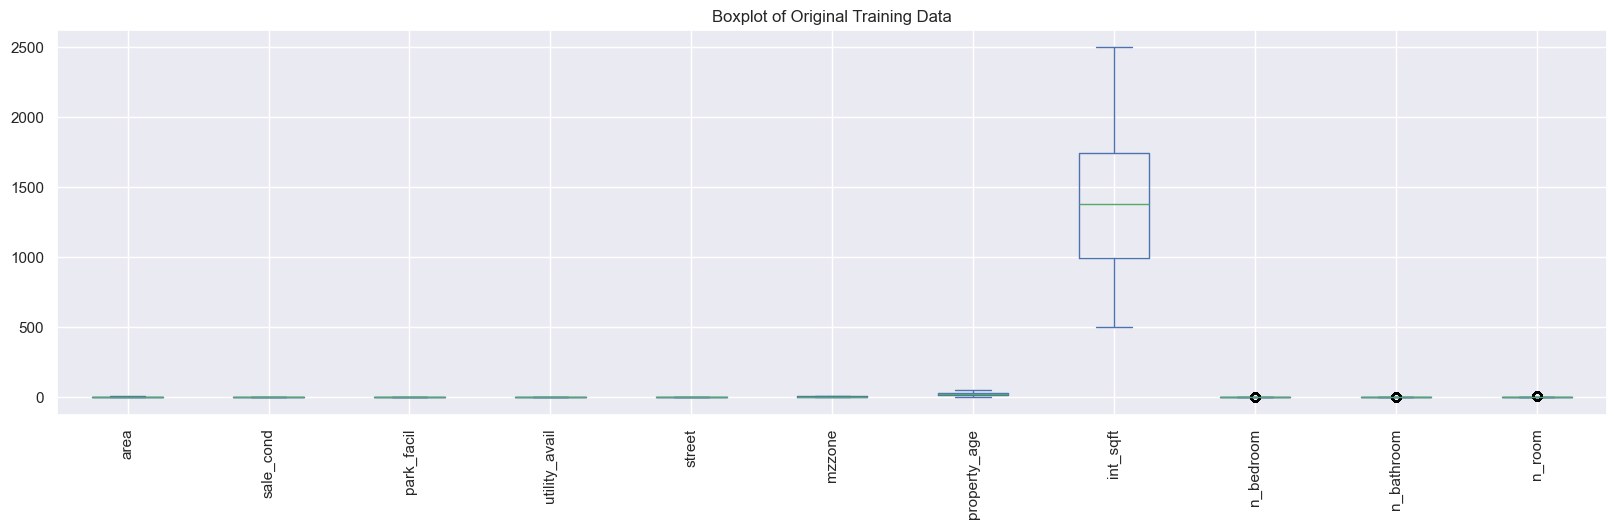

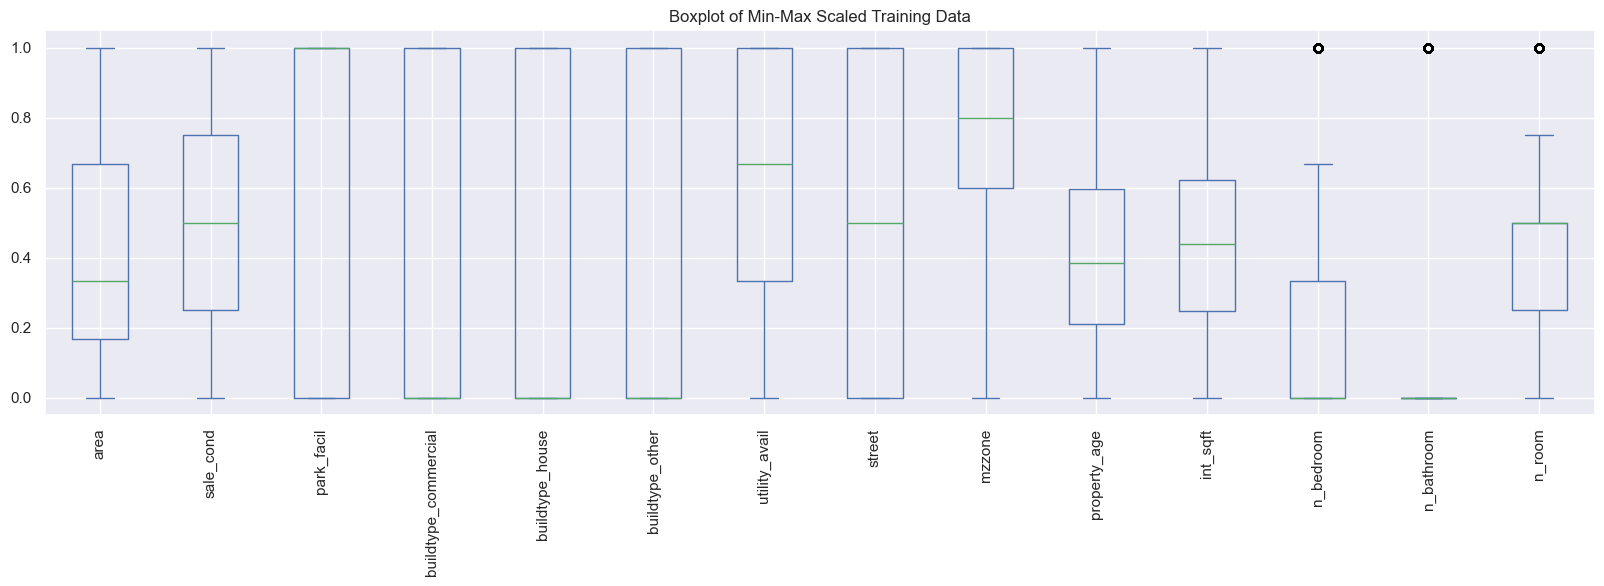

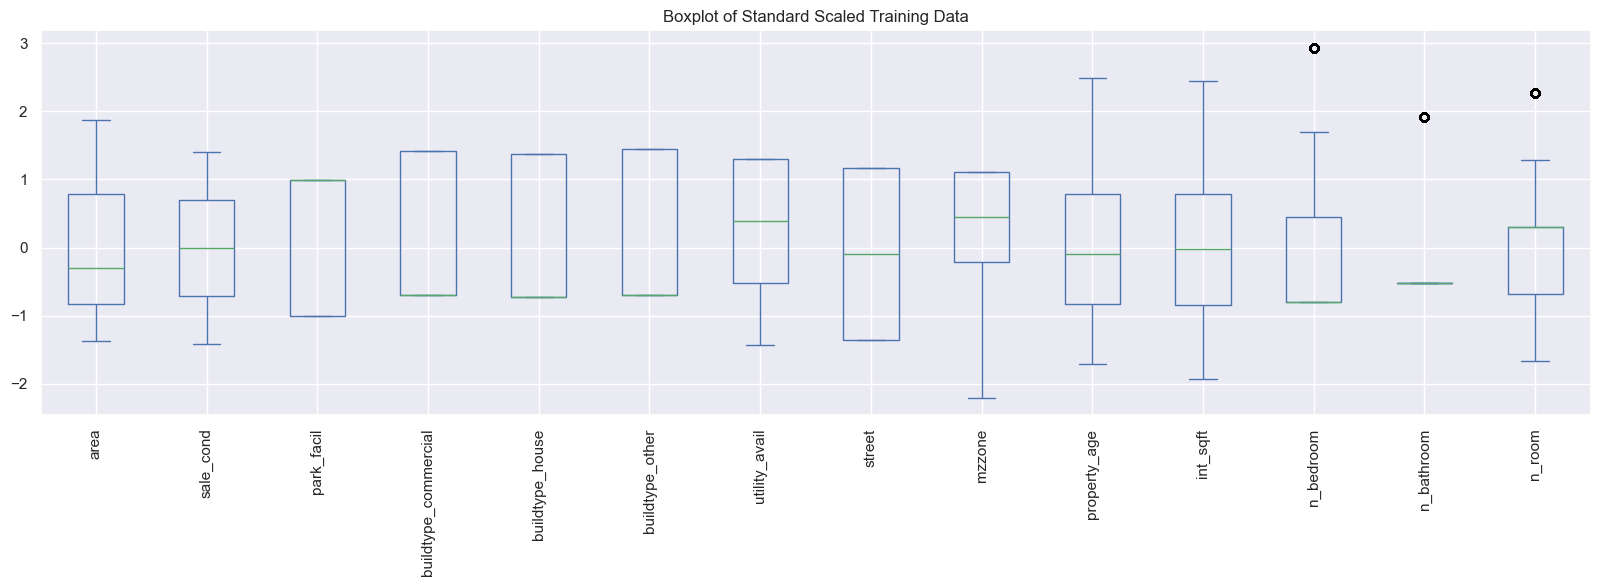

R² SCORE (MinMaxScaler): 0.9928826093673706
R² SCORE (StandardScaler): 0.9928826093673706
R² SCORE (Original Data): 0.9928826093673706


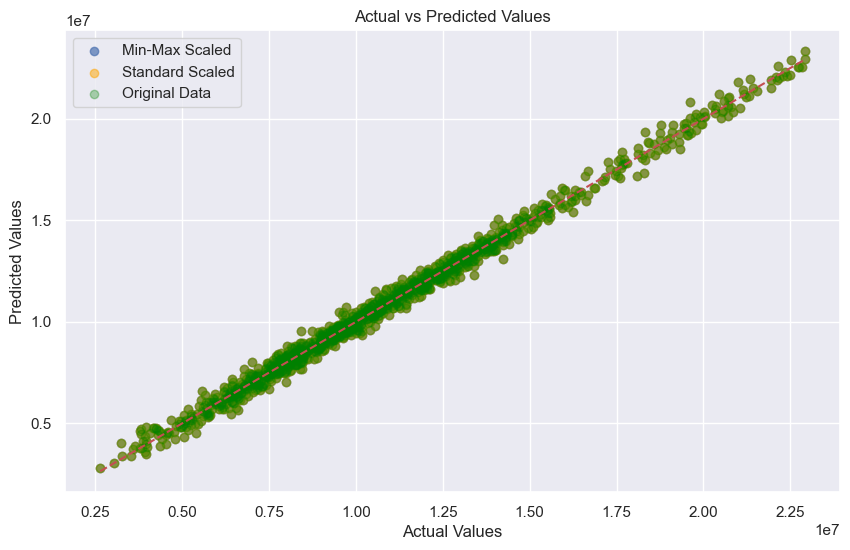

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import XGBRegressor
from sklearn import metrics

# Assuming input and target are defined
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=7)

# Box plot for the original training data
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20, 5), rot=90)
plt.title("Boxplot of Original Training Data")
plt.show()

# Min-Max Scaling
mm = MinMaxScaler().fit(X_train)
X_train_mm = mm.transform(X_train)
X_test_mm = mm.transform(X_test)

# Box plot for the Min-Max scaled training data
X_train_mm_df = pd.DataFrame(X_train_mm, columns=X_train.columns)
X_train_mm_df.plot.box(figsize=(20, 5), rot=90)
plt.title("Boxplot of Min-Max Scaled Training Data")
plt.show()

# Standard Scaling
ss = StandardScaler().fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

# Box plot for the Standard scaled training data
X_train_ss_df = pd.DataFrame(X_train_ss, columns=X_train.columns)
X_train_ss_df.plot.box(figsize=(20, 5), rot=90)
plt.title("Boxplot of Standard Scaled Training Data")
plt.show()

# Build and evaluate the model using Min-Max scaling
xg = XGBRegressor(learning_rate=.7, n_estimators=100, verbosity=0)

# Fit model on Min-Max scaled data
xg.fit(X_train_mm, y_train)
y_pred_gbrmm = xg.predict(X_test_mm)
print('R² SCORE (MinMaxScaler):', metrics.r2_score(y_test, y_pred_gbrmm))

# Fit model on Standard scaled data
xg.fit(X_train_ss, y_train)
y_pred_gbrss = xg.predict(X_test_ss)
print('R² SCORE (StandardScaler):', metrics.r2_score(y_test, y_pred_gbrss))

# Fit model on original data
xg.fit(X_train, y_train)
y_pred_original = xg.predict(X_test)
print('R² SCORE (Original Data):', metrics.r2_score(y_test, y_pred_original))

# Optional: Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbrmm, alpha=0.7, label='Min-Max Scaled')
plt.scatter(y_test, y_pred_gbrss, alpha=0.5, label='Standard Scaled', color='orange')
plt.scatter(y_test, y_pred_original, alpha=0.3, label='Original Data', color='green')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.legend()
plt.show()


In [35]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Impute missing values in the feature columns
imputer_X = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer_X.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer_X.transform(X_test), columns=X_test.columns)

# Check for NaNs in the target variable (optional imputation for y)
imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_imputed = imputer_y.transform(y_test.values.reshape(-1, 1)).ravel()


In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import xgboost as xgb
from sklearn.metrics import r2_score

# Min-Max Scaling
mm = MinMaxScaler()
X_train_scaled = mm.fit_transform(X_train_imputed)
X_test_scaled = mm.transform(X_test_imputed)

# Standard Scaling (if you prefer)
ss = StandardScaler()
X_train_scaled_ss = ss.fit_transform(X_train_imputed)
X_test_scaled_ss = ss.transform(X_test_imputed)


In [37]:
from sklearn.model_selection import GridSearchCV

# Define XGBRegressor and parameters for GridSearchCV
xg = xgb.XGBRegressor()
param_grid = {
    'learning_rate': [0.05, 0.1, 0.3, 0.7],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
}

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_imputed)

# Best estimator and score
best_xg_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best R² score:", grid_search.best_score_)

# Predict and evaluate on test set
y_pred_test = best_xg_model.predict(X_test_scaled)
print("Test R² Score:", r2_score(y_test_imputed, y_pred_test))


Best parameters: {'learning_rate': 0.7, 'max_depth': 3, 'n_estimators': 150}
Best R² score: 0.9976997504680906
Test R² Score: 0.9981401758307955


In [45]:
areas = ['Anna Nagar', 'T Nagar', 'Velachery', 'Chrompet', 'Karapakkam', 'KK Nagar', 'Adyar']


In [52]:
def predict_price(area, int_sqft, n_bathroom, bhk):
    if area not in areas:
        print("Area not found. Please choose from:", ', '.join(areas))
        return
    
    # Create a DataFrame with input features
    area_data = pd.DataFrame([{
        'area': area,
        'int_sqft': int_sqft,
        'n_bathroom': n_bathroom,
        'bhk': bhk
    }])
    
    # One-hot encode the area feature to match the model
    area_data = pd.get_dummies(area_data, columns=['area'])
    
    # Reindex area_data to match X_train’s columns, filling missing values with 0
    area_data = area_data.reindex(columns=X_train.columns, fill_value=0)
    
    # Scale the data
    area_data_scaled = mm.transform(area_data)
    
    # Predict using the best model
    predicted_price = best_xg_model.predict(area_data_scaled)
    
    # Format the predicted price with commas for readability
    formatted_price = f"{predicted_price[0]:,.2f}"
    print(f"Predicted Price for {area}: ₹{formatted_price}")

# Example prediction calls
predict_price('Anna Nagar', 1000, 2, 2)
predict_price('T Nagar', 1200, 1, 1)
predict_price('Invalid Area', 800, 1, 1)  # should return "Area not found"


Predicted Price for Anna Nagar: ₹3,895,696.75
Predicted Price for T Nagar: ₹5,056,592.00
Area not found. Please choose from: Anna Nagar, T Nagar, Velachery, Chrompet, Karapakkam, KK Nagar, Adyar


In [53]:
predict_price('KK Nagar', 1200, 1, 1)

Predicted Price for KK Nagar: ₹5,056,592.00


In [54]:
predict_price('Anna Nagar', 1000, 2, 3)

Predicted Price for Anna Nagar: ₹3,895,696.75


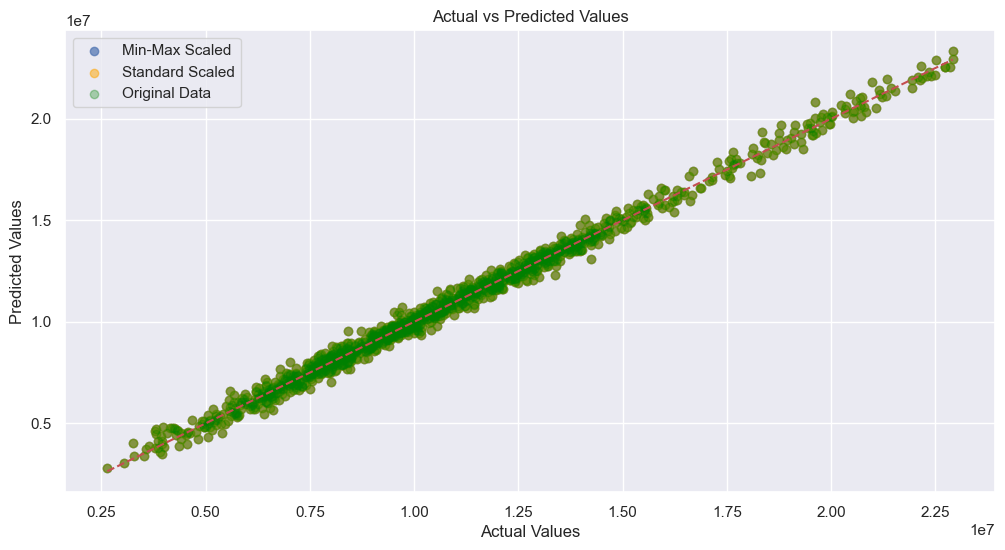

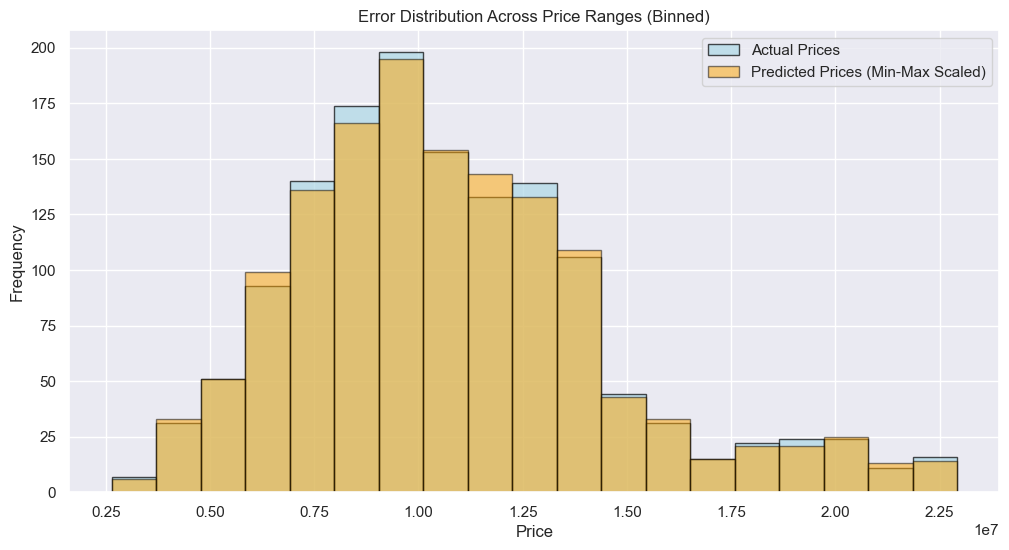

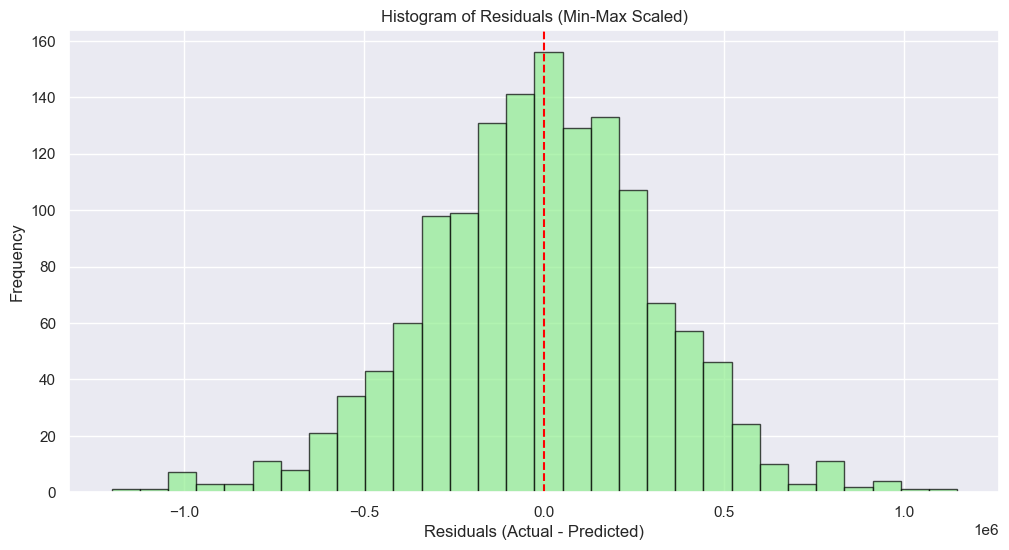

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import XGBRegressor
from sklearn import metrics

# Assuming input and target are defined
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=7)

# Scale data
mm = MinMaxScaler().fit(X_train)
X_train_mm = mm.transform(X_train)
X_test_mm = mm.transform(X_test)

ss = StandardScaler().fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

# Fit model and make predictions
xg = XGBRegressor(learning_rate=0.7, n_estimators=100, verbosity=0)

# Min-Max Scaled Data
xg.fit(X_train_mm, y_train)
y_pred_gbrmm = xg.predict(X_test_mm)

# Standard Scaled Data
xg.fit(X_train_ss, y_train)
y_pred_gbrss = xg.predict(X_test_ss)

# Original Data
xg.fit(X_train, y_train)
y_pred_original = xg.predict(X_test)

# Plot 1: Scatter plot of actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_gbrmm, alpha=0.7, label='Min-Max Scaled')
plt.scatter(y_test, y_pred_gbrss, alpha=0.5, label='Standard Scaled', color='orange')
plt.scatter(y_test, y_pred_original, alpha=0.3, label='Original Data', color='green')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.legend()
plt.show()

# Plot 2: Error distribution across price ranges (binned)
plt.figure(figsize=(12, 6))
price_bins = np.linspace(y_test.min(), y_test.max(), 20)  # Linear bins
plt.hist(y_test, bins=price_bins, alpha=0.7, color='lightblue', edgecolor='black', label='Actual Prices')
plt.hist(y_pred_gbrmm, bins=price_bins, alpha=0.5, color='orange', edgecolor='black', label='Predicted Prices (Min-Max Scaled)')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Error Distribution Across Price Ranges (Binned)")
plt.legend()
plt.show()

# Plot 3: Histogram of Residuals
residuals = y_test - y_pred_gbrmm
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Min-Max Scaled)")
plt.axvline(x=0, color='red', linestyle='--')  # Line at zero residual
plt.show()


In [56]:
predict_price('KK Nagar', 1800, 1, 1)

Predicted Price for KK Nagar: ₹7,469,983.50


In [57]:
predict_price('KK Nagar', 1800, 1, 2)

Predicted Price for KK Nagar: ₹7,469,983.50


In [58]:
predict_price('KK Nagar', 1800, 1, 3)

Predicted Price for KK Nagar: ₹7,469,983.50


In [59]:
predict_price('T Nagar', 1800, 1, 3)

Predicted Price for T Nagar: ₹7,469,983.50
